In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:,.2f}'.format)

# Load Data

In [2]:
life_exp_df = pd.read_csv('life_expectancy.csv')
nr_of_births_df = pd.read_csv('number_of_births.csv')
pop_by_country_df = pd.read_csv('population_by_country.csv')
children_per_woman_df = pd.read_csv('children_per_woman.csv')
countries_continents_df = pd.read_csv('countries_continents.csv')

life_exp_df.head()

Entity Code  Year  life_expectancy
0  Afghanistan  AFG  1960            32.45
1  Afghanistan  AFG  1961            32.96
2  Afghanistan  AFG  1962            33.47
3  Afghanistan  AFG  1963            33.97
4  Afghanistan  AFG  1964            34.46

In [3]:
nr_of_births_df.head()

Entity Code  Year     births
0  Afghanistan  AFG  1950 390,647.00
1  Afghanistan  AFG  1951 393,556.00
2  Afghanistan  AFG  1952 399,578.00
3  Afghanistan  AFG  1953 406,005.00
4  Afghanistan  AFG  1954 412,837.00

In [4]:
pop_by_country_df.head()

Rank         Entity      pop2022      pop2021  GrowthRate     area  Density
0     1          China 1,448,471.40 1,444,216.11        1.00  9706961   149.22
1     2          India 1,406,631.78 1,393,409.04        1.01  3287590   427.86
2     3  United States   334,805.27   332,915.07        1.01  9372610    35.72
3     4      Indonesia   279,134.51   276,361.78        1.01  1904569   146.56
4     5       Pakistan   229,488.99   225,199.94        1.02   881912   260.22

In [5]:
children_per_woman_df.head()

Entity      Code  Year  births_per_woman   population Continent
0     Abkhazia  OWID_ABK  2015               NaN          NaN      Asia
1  Afghanistan       AFG  1950              7.45 7,752,117.00       NaN
2  Afghanistan       AFG  1951              7.45 7,840,151.00       NaN
3  Afghanistan       AFG  1952              7.45 7,935,996.00       NaN
4  Afghanistan       AFG  1953              7.45 8,039,684.00       NaN

In [6]:
countries_continents_df.head()

Continent   Country
0    Africa   Algeria
1    Africa    Angola
2    Africa     Benin
3    Africa  Botswana
4    Africa   Burkina

# Look for which countries data is available

In [7]:
countries_exp = life_exp_df['Entity'].unique()
countries_births = nr_of_births_df['Entity'].unique()
countries_pop = pop_by_country_df['Entity'].unique()
countries_chi = children_per_woman_df['Entity'].unique()
countries_cc = countries_continents_df['Country'].unique()

countries = np.intersect1d(np.intersect1d(np.intersect1d(np.intersect1d(countries_exp, countries_births), np.array(countries_pop)), countries_chi), countries_cc)
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq

In [8]:
set(countries_continents_df['Continent'])

{'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'}

## Preparation for plotting

In [9]:
birth_dic = {}

for country in countries:
    years = nr_of_births_df[nr_of_births_df['Entity'] == country]['Year'].to_numpy()
    births = nr_of_births_df[nr_of_births_df['Entity'] == country]['births'].to_numpy()
    pop = pop_by_country_df[pop_by_country_df['Entity'] == country]['pop2021'].iloc[0] * 1000


    birth_dic[country] = {}
    birth_dic[country]['years'] = years
    birth_dic[country]['births'] = births
    birth_dic[country]['normalized_births'] = (births / pop) * 1000

In [10]:
def plot_countries_births_over_time(countries_to_plot, title, normalized=False, show_legend=True):
    fig = plt.figure(figsize=(30, 15))
    ax = fig.add_subplot(111)

    if normalized:
        for c in countries_to_plot:
            plt.plot(birth_dic[c]['years'], birth_dic[c]['normalized_births'], label=c)
            ax.set_ylabel('Births / Year / 1000 People')
    else:
        for c in countries_to_plot:
            plt.plot(birth_dic[c]['years'], birth_dic[c]['births'], label=c)
            ax.set_ylabel('Births / Year')

    plt.title(title)
    ax.set_xlabel("Timeline")

    if show_legend:
        plt.legend(loc=2)
    plt.show()

# Write function for calculating the future population of a country

## Description:


### Future Population
The future population can very easily be calculated by multiplying the number of births in one of the recent years times the life expectancy.
Then you get approximately the population of that country (without taking immigrants and emigrants into consideration) in N years, where N stands for the life expectancy in that country.


### Change
The change get's calculated with respect to the old population.


### Epoch
I may sometimes refer to an epoch. In this context, I define the first epoch as the duration from "now" (*) until the year I calculate the future population (= "now" + life expectancy per country).


### Birthrates
The birthrate says how many children per woman are born.

The "birthrate to restore" stands for the average birthrate a country would have to have if it has currently the calculated future population size and wants to have the current (2021) population size again.
In other words, after one epoch, the country would have to have the "birthrate to restore" as an average birthrate for one full epoch, in order to have the original 2021 population size after 2 epochs.

The "birthrate to restore after 2 epochs" is the birthrate a country would have to have for one full epoch if the birthrate stays the same for the following 2 epochs.


## Important Notes:
1. In all future predictions I assume that the birthrate stays the same as it is "now" (*). This will probably be NOT the case since the birthrate has fallen in the recent years in a lot of countries.
2. I assumed for the "birthrate to restore after 2 epochs" that the amount of births for the second epoch will change in the same way as the population grows/shrinks.
3. I assumed for every country that the population consists of 50% males and 50% females.
4. Obviously, the birth rate per woman has to be 2 for the size of the future population to be equal to the current one.


(*)  (most of the data is from 2019)

In [11]:
def calc_change(current_pop, future_pop):
    diff = future_pop - current_pop
    calculated_change = diff / current_pop
    return calculated_change

def calc_future_population(selected_country):
    if selected_country not in countries:
        raise Exception("Country not available!")

    population_of_country = pop_by_country_df[pop_by_country_df['Entity'] == selected_country]['pop2021'] * 1000

    selected_continent = countries_continents_df[countries_continents_df['Country'] == selected_country]['Continent'].iloc[0]

    birth_entity = nr_of_births_df[nr_of_births_df['Entity'] == selected_country]
    exp_entity = life_exp_df[life_exp_df['Entity'] == selected_country]
    children_per_woman_entity = children_per_woman_df[children_per_woman_df['Entity'] == selected_country]

    birth_df_year = birth_entity.iloc[-1]['Year']
    exp_year = exp_entity.iloc[-1]['Year']

    max_common_year = min(birth_df_year, exp_year)

    births_ = birth_entity[birth_entity['Year'] == max_common_year]['births'].iloc[0]
    life_exp = exp_entity[exp_entity['Year'] == max_common_year]['life_expectancy'].iloc[0]
    birth_rate = children_per_woman_entity[children_per_woman_entity['Year'] == max_common_year]['births_per_woman'].iloc[0]

    future_population_ = births_ * life_exp

    # calc change
    pop_of_country = population_of_country.iloc[0]
    change_ = calc_change(pop_of_country, future_population_)

    birth_rate_to_restore = pop_of_country / (future_population_ / 2)
    # Assuming equal change in number of births
    births_then = births_ + births_ * change_
    # Ignoring that the life expectancy will probably be much higher than now
    pop_then = births_then * life_exp
    birth_rate_to_restore_then = pop_of_country / (pop_then / 2)


    return pd.DataFrame(
        {
            'Country': selected_country,
            'Current Population': population_of_country,
            'Future Population': future_population_,
            'Change in %': change_*100,
            'Births': births_,
            'Life Expectancy': life_exp,
            'Birthrate now': birth_rate,
            'Birthrate to restore': birth_rate_to_restore,
            'Birthrate to restore after 2 epochs': birth_rate_to_restore_then,
            'Continent': selected_continent,
            'Prediction year': max_common_year + int(life_exp),
            'Data from year': max_common_year
         }
    )

In [12]:
calc_future_population('Austria')

Country  Current Population  Future Population  Change in %    Births  \
98  Austria        9,043,070.00       7,285,437.85       -19.44 89,072.00   

    Life Expectancy  Birthrate now  Birthrate to restore  \
98            81.79           1.54                  2.48   

    Birthrate to restore after 2 epochs Continent  Prediction year  \
98                                 3.08    Europe             2100   

    Data from year  
98            2019

In [13]:
dfs = []

current_population = 0
future_population = 0

for country in countries:
    continent = countries_continents_df[countries_continents_df['Country'] == country]['Continent'].iloc[0]

    df = calc_future_population(country)
    dfs.append(df)

    current_population += df['Current Population'].iloc[0]
    future_population += df['Future Population'].iloc[0]

countries_df = pd.concat(dfs)
countries_df

Country  Current Population  Future Population  Change in %  \
37           Afghanistan       39,835,428.00      78,545,763.00        97.18   
142              Albania        2,872,933.00       2,625,988.23        -8.60   
34               Algeria       44,616,624.00      77,817,013.44        74.41   
42                Angola       33,933,610.00      78,481,440.74       131.28   
195  Antigua and Barbuda           98,731.00         112,982.47        14.43   
..                   ...                 ...                ...          ...   
50             Venezuela       28,704,954.00      37,125,282.94        29.33   
14               Vietnam       98,168,833.00     119,497,539.20        21.73   
48                 Yemen       30,490,640.00      57,629,789.00        89.01   
62                Zambia       18,920,651.00      40,927,607.61       116.31   
74              Zimbabwe       15,092,171.00      26,821,261.61        77.72   

          Births  Life Expectancy  Birthrate now  Birthrate to restore  \
37  1,211,509.00            64.83           4.32                  1.01   
142    33,421.00            78.57           1.60                  2.19   
34  1,012,188.00            76.88           2.99                  1.15   
42  1,283,488.00            61.15           5.44                  0.86   
195     1,467.00            77.02           1.99                  1.75   
..           ...              ...            ...                   ...   
50    515,171.00            72.06           2.25                  1.55   
14  1,584,848.00            75.40           2.05                  1.64   
48    871,528.00            66.12           3.70                  1.06   
62    640,635.00            63.89           4.56                  0.92   
74    436,189.00            61.49           3.53                  1.13   

     Birthrate to restore after 2 epochs      Continent  Prediction year  \
37                                  0.51           Asia             2083   
142                                 2.39         Europe             2097   
34                                  0.66         Africa             2095   
42                                  0.37         Africa             2080   
195                                 1.53  North America             2096   
..                                   ...            ...              ...   
50                                  1.20  South America             2091   
14                                  1.35           Asia             2094   
48                                  0.56           Asia             2085   
62                                  0.43         Africa             2082   
74                                  0.63         Africa             2080   

     Data from year  
37             2019  
142            2019  
34             2019  
42             2019  
195            2019  
..              ...  
50             2019  
14             2019  
48             2019  
62             2019  
74             2019  

[180 rows x 12 columns]

## Prediction of the population of all countries available together

In [14]:
change = calc_change(current_population, future_population)

print('Current Population: ', f"{current_population:.2f}")
print('Future Population:  ', f"{future_population:.2f}")
print('Absolute Difference:', f"{abs(future_population - current_population):.2f}")
print('Change in Percent:  ', f"{change*100:.2f}%")

Current Population:  7707873760.00
Future Population:   9514712917.43
Absolute Difference: 1806839157.43
Change in Percent:   23.44%


## Plotting births by country

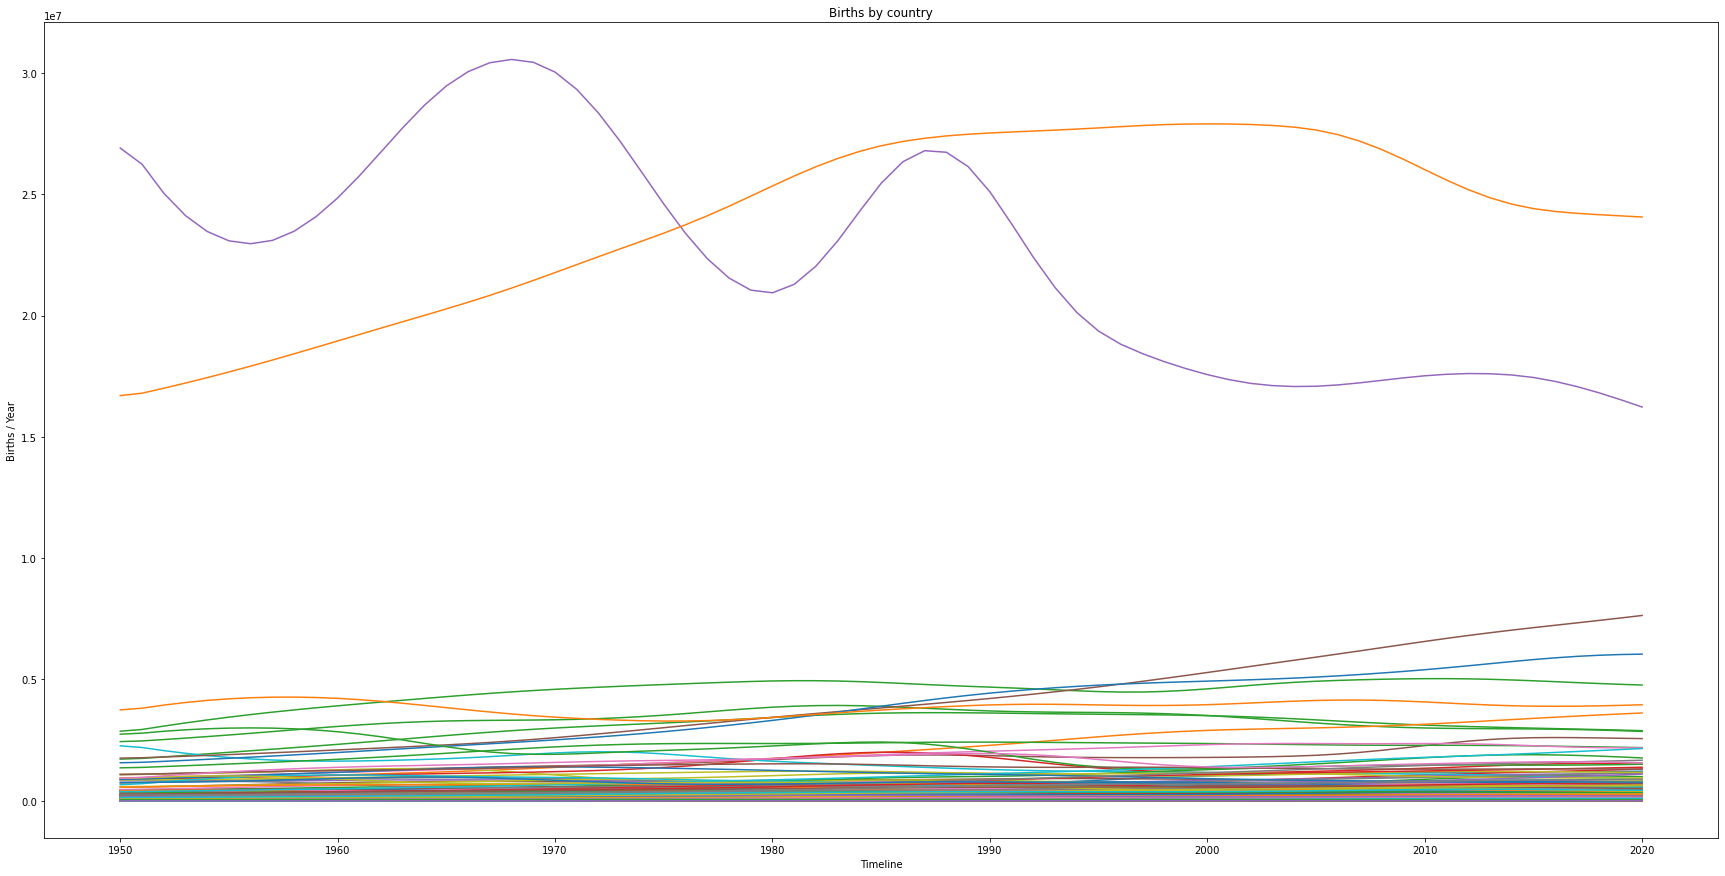

In [15]:
plot_countries_births_over_time(countries, title='Births by country', show_legend=False)

Obviously, this does not tell us much, except that there are two countries which have due to there big population a lot of births per year.
These countries are India (orange) and China (violet).

In order to see more details of the other countries, we can plot the normalized birthrates:

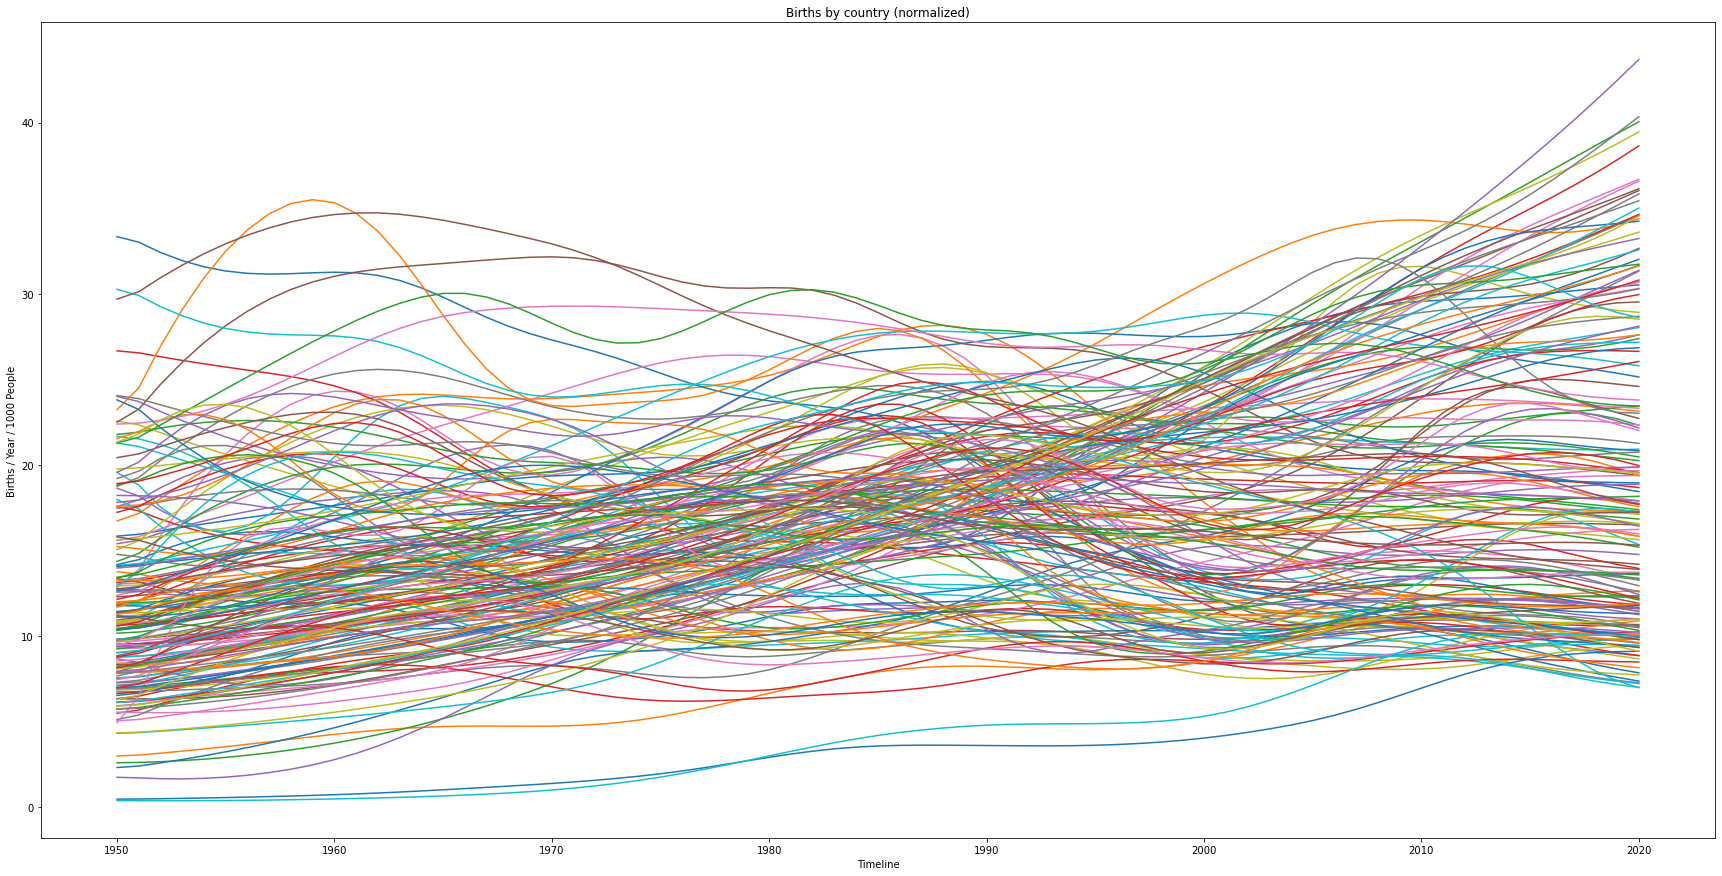

In [16]:
plot_countries_births_over_time(countries, title='Births by country (normalized)', normalized=True, show_legend=False)

# Get N countries with biggest positive change

In [17]:
N = 20
sorted_countries_df = countries_df.sort_values(by=['Change in %'], ascending=False)
countries_with_biggest_positive_change = sorted_countries_df.iloc[:N]
countries_with_biggest_positive_change

Country  Current Population  Future Population  \
54                   Niger       25,130,817.00      66,621,739.88   
42                  Angola       33,933,610.00      78,481,440.74   
60                    Mali       20,855,735.00      47,949,968.51   
73                 Somalia       16,359,504.00      36,980,026.14   
22                Tanzania       61,498,437.00     138,210,213.09   
146                 Gambia        2,486,945.00       5,555,336.50   
78                 Burundi       12,255,433.00      27,289,902.67   
169        Solomon Islands          703,996.00       1,561,749.42   
30                  Uganda       47,123,531.00     104,463,922.30   
69                 Senegal       17,196,301.00      37,624,774.63   
58            Burkina Faso       21,497,096.00      46,952,277.77   
62                  Zambia       18,920,651.00      40,927,607.61   
46              Mozambique       32,163,047.00      68,829,890.36   
70                    Chad       16,914,985.00      36,110,373.60   
187  Sao Tome and Principe          223,368.00         472,283.35   
77                   Benin       12,451,040.00      26,159,894.96   
75                  Guinea       13,497,244.00      28,342,525.78   
51              Madagascar       28,427,328.00      58,713,770.35   
61                  Malawi       19,647,684.00      40,515,957.87   
76                  Rwanda       13,276,513.00      27,237,974.78   

     Change in %       Births  Life Expectancy  Birthrate now  \
54        165.10 1,067,314.00            62.42           6.82   
42        131.28 1,283,488.00            61.15           5.44   
60        129.91   808,518.00            59.31           5.79   
73        126.05   644,285.00            57.40           5.98   
22        124.74 2,111,498.00            65.46           4.83   
146       123.38    89,530.00            62.05           5.15   
78        122.68   443,133.00            61.58           5.32   
169       121.84    21,395.00            73.00           4.36   
30        121.68 1,648,528.00            63.37           4.82   
69        118.80   553,786.00            67.94           4.56   
58        118.41   762,497.00            61.58           5.11   
62        116.31   640,635.00            63.89           4.56   
46        114.00 1,131,066.00            60.85           4.78   
70        113.48   665,764.00            54.24           5.65   
187       111.44     6,710.00            70.39           4.27   
77        110.10   423,498.00            61.77           4.77   
75        109.99   460,091.00            61.60           4.62   
51        106.54   875,789.00            67.04           4.03   
61        106.21   630,471.00            64.26           4.13   
76        105.16   394,616.00            69.02           3.99   

     Birthrate to restore  Birthrate to restore after 2 epochs Continent  \
54                   0.75                                 0.28    Africa   
42                   0.86                                 0.37    Africa   
60                   0.87                                 0.38    Africa   
73                   0.88                                 0.39    Africa   
22                   0.89                                 0.40    Africa   
146                  0.90                                 0.40    Africa   
78                   0.90                                 0.40    Africa   
169                  0.90                                 0.41   Oceania   
30                   0.90                                 0.41    Africa   
69                   0.91                                 0.42    Africa   
58                   0.92                                 0.42    Africa   
62                   0.92                                 0.43    Africa   
46                   0.93                                 0.44    Africa   
70                   0.94                                 0.44    Africa   
187                  0.95                                 0.45 

Note that 19 of the 20 countries with the biggest **positive** change are African countries.

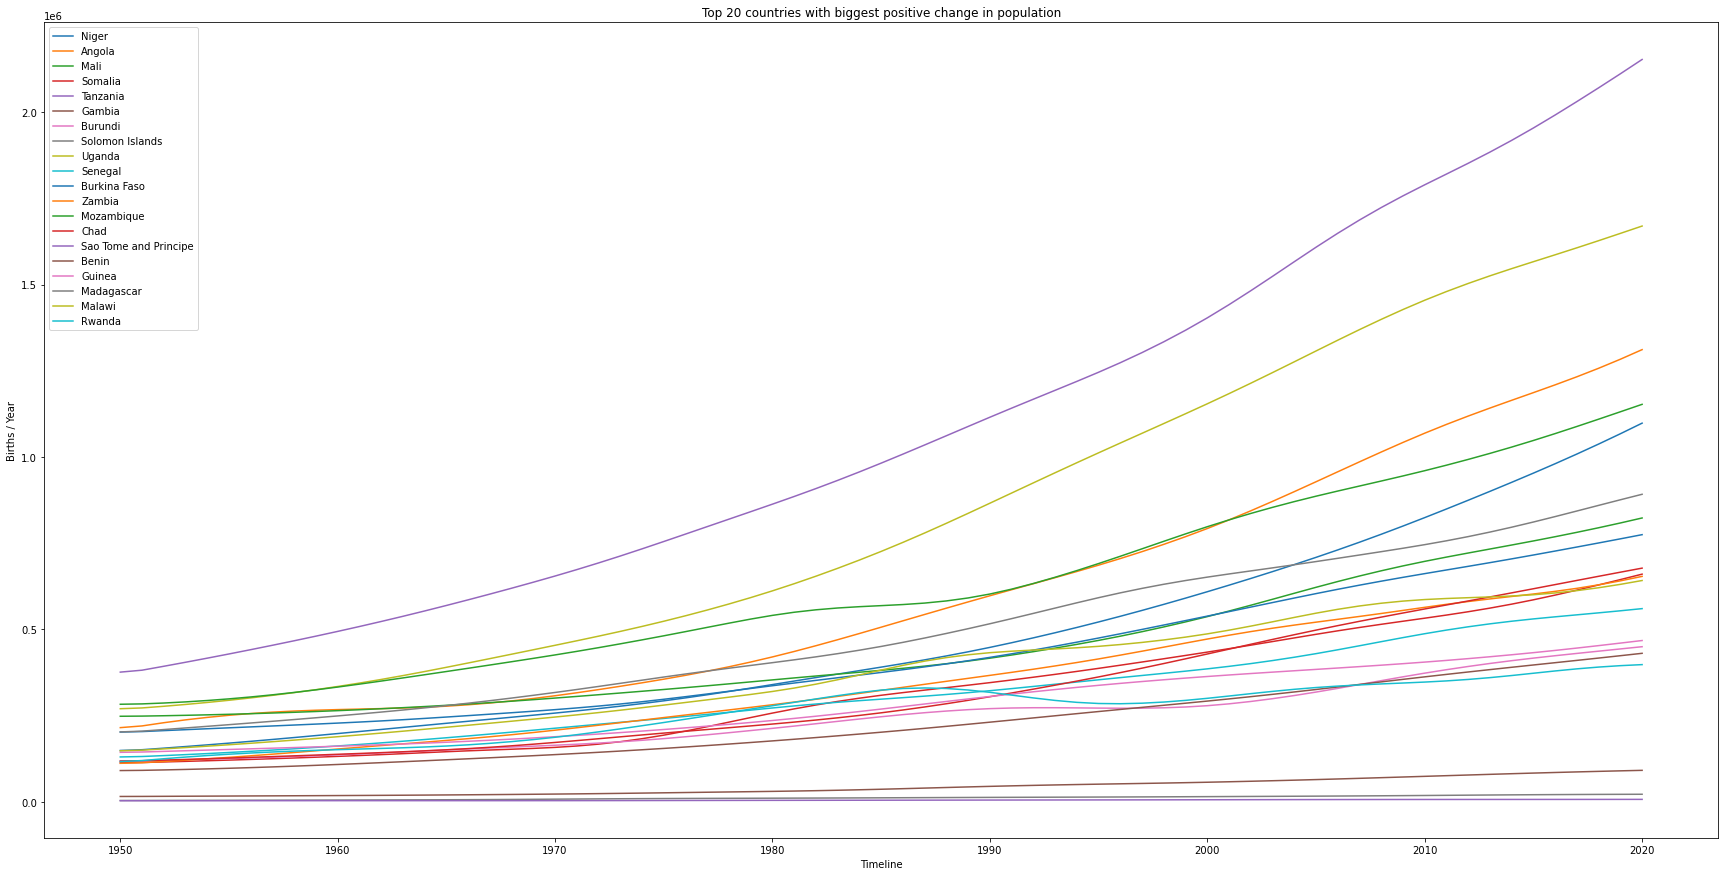

In [18]:
country_list = countries_with_biggest_positive_change['Country']

plot_countries_births_over_time(country_list, title=f"Top {N} countries with biggest positive change in population")

Here we can already see a clear upward trend.

To see more details let's plot the normalized data:

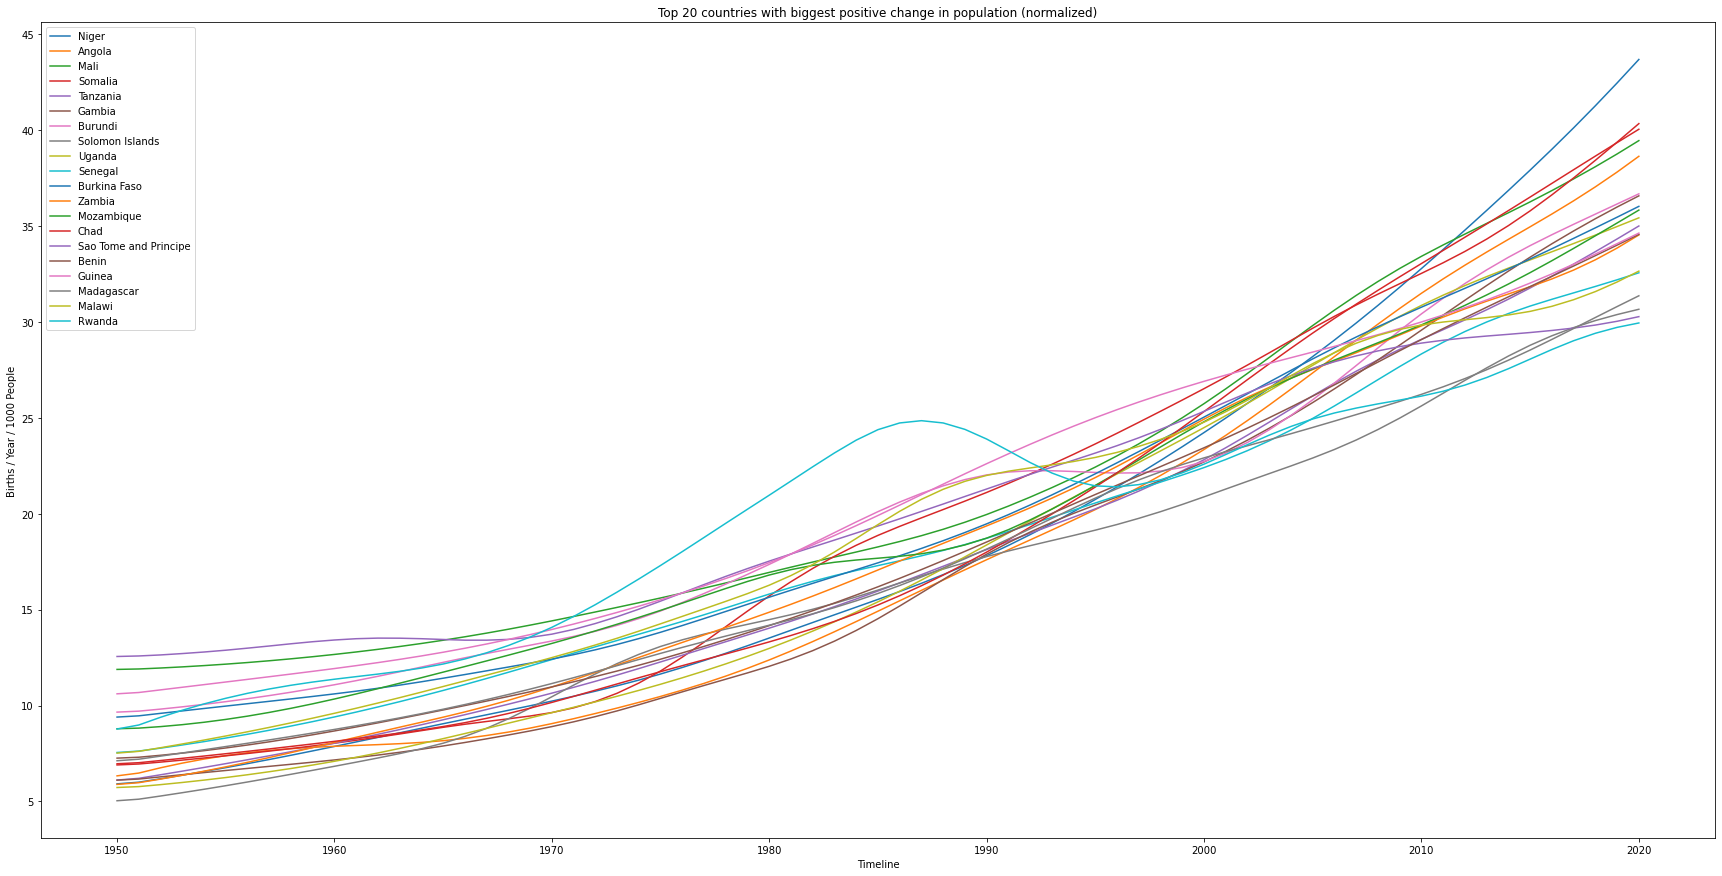

In [19]:
plot_countries_births_over_time(country_list, title=f"Top {N} countries with biggest positive change in population (normalized)", normalized=True)

Here we can see the upward trend even clearer.

Now let's see the countries with the biggest negative change in number of births.

# Get N countries with biggest negative change

In [20]:
N = 20
sorted_countries_df = countries_df.sort_values(by=['Change in %'], ascending=True)
countries_with_biggest_negative_change = sorted_countries_df.iloc[:N]
countries_with_biggest_negative_change

Country  Current Population  Future Population  \
143             Puerto Rico        2,828,255.00       1,666,509.48   
29              South Korea       51,305,186.00      30,535,923.66   
24                    Italy       60,367,477.00      37,165,598.45   
10                    Japan      126,050,804.00      78,138,013.75   
87                   Greece       10,370,744.00       6,440,980.89   
137  Bosnia and Herzegovina        3,263,466.00       2,036,497.71   
92                 Portugal       10,167,925.00       6,386,941.17   
108                Bulgaria        6,896,663.00       4,636,616.54   
35                  Ukraine       43,466,819.00      29,302,097.65   
31                    Spain       46,745,216.00      32,291,555.11   
131                 Croatia        4,081,651.00       2,829,081.45   
114               Singapore        5,896,686.00       4,182,893.81   
102                  Serbia        8,697,550.00       6,227,089.16   
132                 Moldova        4,024,019.00       2,884,596.22   
95                  Hungary        9,634,164.00       6,953,803.90   
140                   Qatar        2,930,528.00       2,134,359.11   
66                  Romania       19,127,774.00      14,086,448.69   
117                 Finland        5,548,360.00       4,092,130.78   
160               Mauritius        1,273,433.00         949,996.22   
40                   Poland       37,797,005.00      28,573,888.51   

     Change in %     Births  Life Expectancy  Birthrate now  \
143       -41.08  20,850.00            79.93           1.19   
29        -40.48 366,900.00            83.23           1.09   
24        -38.43 446,715.00            83.20           1.31   
10        -38.01 926,285.00            84.36           1.37   
87        -37.89  78,607.00            81.94           1.29   
137       -37.60  26,311.00            77.40           1.25   
92        -37.19  79,161.00            80.68           1.30   
108       -32.77  61,892.00            74.91           1.57   
35        -32.59 407,952.00            71.83           1.44   
31        -30.92 386,793.00            83.49           1.34   
131       -30.69  36,074.00            78.42           1.43   
114       -29.06  50,096.00            83.50           1.22   
102       -28.40  82,276.00            75.69           1.45   
132       -28.32  40,119.00            71.90           1.27   
95        -27.82  91,471.00            76.02           1.51   
140       -27.17  26,604.00            80.23           1.85   
66        -26.36 186,678.00            75.46           1.63   
117       -26.25  50,035.00            81.79           1.48   
160       -25.40  12,797.00            74.24           1.37   
40        -24.40 367,009.00            77.86           1.44   

     Birthrate to restore  Birthrate to restore after 2 epochs      Continent  \
143                  3.39                                 5.76  North America   
29                   3.36                                 5.65           Asia   
24                   3.25                                 5.28         Europe   
10                   3.23                                 5.20           Asia   
87                   3.22                                 5.18         Europe   
137                  3.20                                 5.14         Europe   
92                   3.18                                 5.07         Europe   
108                  2.97                                 4.42         Europe   
35                   2.97                                 4.40         Europe   
31                   2.90                                 4.19         Europe   
131                  2.89                                 4.16         Europe   
114                  2.82                                 3.97           Asia   
102                  2.79                                 3.90         Europe   
132                  2.79                                 3.89         Europe   
95        

Note that 14 of the 20 countries with the biggest **negative** change are European countries.

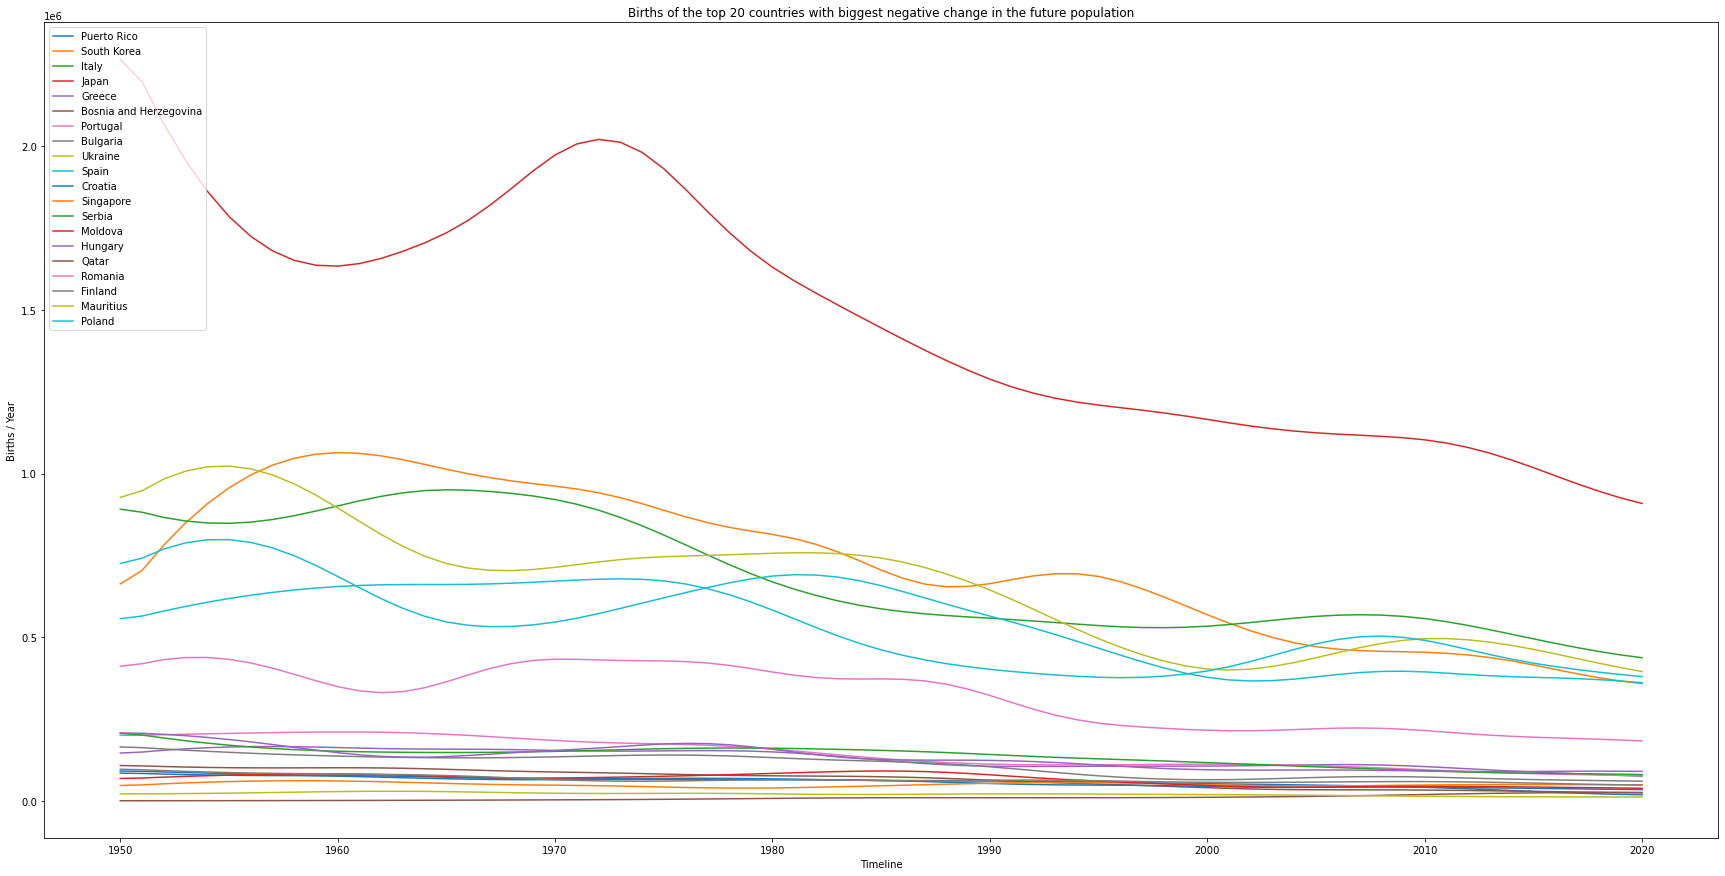

In [21]:
country_list = countries_with_biggest_negative_change['Country']

plot_countries_births_over_time(country_list, title=f"Births of the top {N} countries with biggest negative change in the future population")

Here we see a downward trend, but to see it more clearly, let's plot the normalized data:

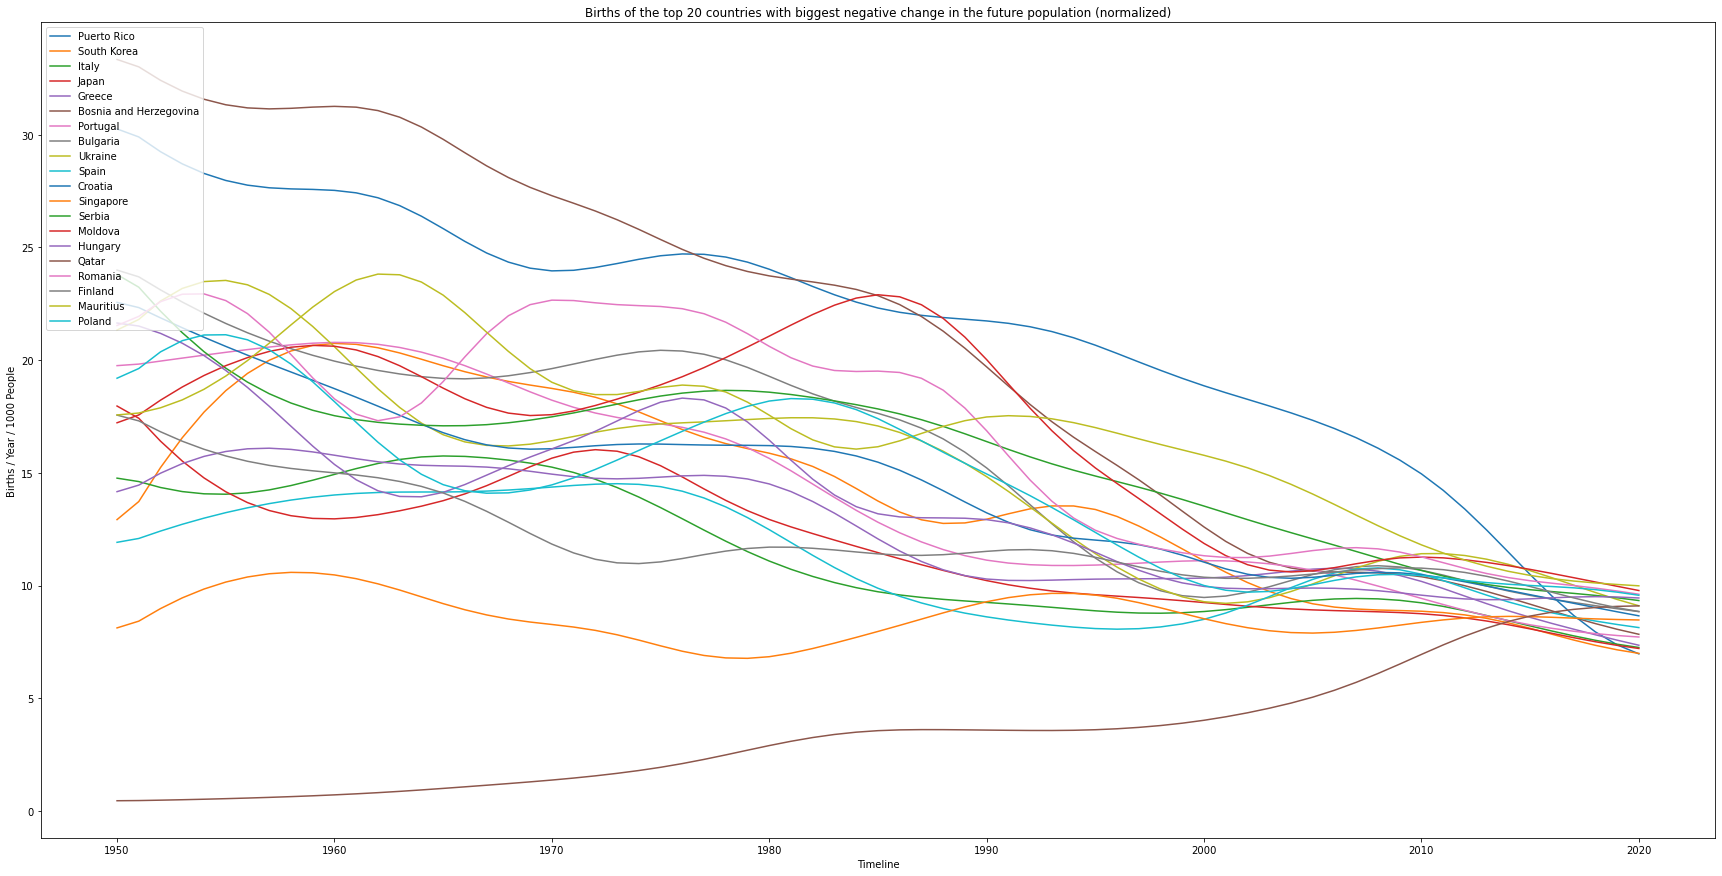

In [22]:
plot_countries_births_over_time(country_list, title=f"Births of the top {N} countries with biggest negative change in the future population (normalized)", normalized=True)

This definitely looks very interesting!
The 20 countries have pretty different birthrates in 1950 but in 2020 they are very similar.
Furthermore, 19 of these 20 countries have a clear downward trend.

# Grouping by continent

As we have already seen, the current birth numbers differ a lot and often depend on the continent.
So let's go ahead and have a look on the birth numbers of different continents separately:

In [23]:
continent_dict = {}

for continent in countries_continents_df['Continent'].unique():

    dfs = []

    current_population = 0
    future_population = 0

    for country in countries:
        continent_of_country = countries_continents_df[countries_continents_df['Country'] == country]['Continent'].iloc[0]

        if continent_of_country == continent:

            df = calc_future_population(country)
            dfs.append(df)

            current_population += df['Current Population'].iloc[0]
            future_population += df['Future Population'].iloc[0]

    countries_df = pd.concat(dfs)
    continent_dict[continent] = {'df': countries_df, 'current_pop': current_population, 'future_pop': future_population}  # countries_df

In [24]:
def get_data_per_continent(continent_):
    change_ = calc_change(continent_dict[continent_]['current_pop'], continent_dict[continent_]['future_pop'])

    print('Current Population: ', f"{continent_dict[continent_]['current_pop']:.2f}")
    print('Future Population:  ', f"{continent_dict[continent_]['future_pop']:.2f}")
    print('Absolute Difference:', f"{abs(continent_dict[continent_]['future_pop'] - continent_dict[continent_]['current_pop']):.2f}")
    print('Change in Percent:  ', f"{change_*100:.2f}%")

    return continent_dict[continent_]['df']

## Europe

In [25]:
get_data_per_continent('Europe')

Current Population:  608964303.00
Future Population:   478528174.32
Absolute Difference: 130436128.68
Change in Percent:   -21.42%


Country  Current Population  Future Population  \
142                 Albania        2,872,933.00       2,625,988.23   
141                 Armenia        2,968,127.00       3,026,006.10   
98                  Austria        9,043,070.00       7,285,437.85   
89               Azerbaijan       10,223,342.00      11,822,210.68   
96                  Belarus        9,442,862.00       8,148,547.09   
82                  Belgium       11,632,326.00      10,157,963.88   
137  Bosnia and Herzegovina        3,263,466.00       2,036,497.71   
108                Bulgaria        6,896,663.00       4,636,616.54   
131                 Croatia        4,081,651.00       2,829,081.45   
161                  Cyprus        1,215,584.00         993,244.23   
115                 Denmark        5,813,298.00       5,066,544.98   
159                 Estonia        1,325,185.00       1,061,365.52   
117                 Finland        5,548,360.00       4,092,130.78   
21                   France       65,426,179.00      59,720,031.99   
133                 Georgia        3,979,765.00       3,888,332.34   
18                  Germany       83,900,473.00      63,633,426.53   
87                   Greece       10,370,744.00       6,440,980.89   
95                  Hungary        9,634,164.00       6,953,803.90   
182                 Iceland          343,353.00         332,968.41   
125                 Ireland        4,982,907.00       4,988,021.62   
24                    Italy       60,367,477.00      37,165,598.45   
153                  Latvia        1,866,942.00       1,515,690.15   
144               Lithuania        2,689,862.00       2,161,143.88   
170              Luxembourg          634,814.00         531,696.46   
177                   Malta          442,784.00         357,740.60   
132                 Moldova        4,024,019.00       2,884,596.22   
171              Montenegro          628,053.00         563,329.07   
71              Netherlands       17,173,099.00      14,149,153.96   
150         North Macedonia        2,082,658.00       1,681,101.66   
118                  Norway        5,465,630.00       4,935,389.68   
40                   Poland       37,797,005.00      28,573,888.51   
92                 Portugal       10,167,925.00       6,386,941.17   
66                  Romania       19,127,774.00      14,086,448.69   
102                  Serbia        8,697,550.00       6,227,089.16   
120                Slovakia        5,460,721.00       4,358,658.31   
151                Slovenia        2,078,724.00       1,602,119.70   
31                    Spain       46,745,216.00      32,291,555.11   
91                   Sweden       10,160,169.00       9,888,823.48   
100             Switzerland        8,715,494.00       7,383,774.70   
35                  Ukraine       43,466,819.00      29,302,097.65   
20           United Kingdom       68,207,116.00      62,742,136.98   

     Change in %     Births  Life Expectancy  Birthrate now  \
142        -8.60  33,421.00            78.57           1.60   
141         1.95  40,300.00            75.09           1.76   
98        -19.44  89,072.00            81.79           1.54   
89         15.64 161,937.00            73.00           2.06   
96        -13.71 109,779.00            74.23           1.72   
82        -12.67 124,262.00            81.75           1.72   
137       -37.60  26,311.00            77.40           1.25   
108       -32.77  61,892.00            74.91           1.57   
131       -30.69  36,074.00            78.42           1.43   
161       -18.29  12,265.00            80.98           1.32   
115       -12.85  62,394.00            81.20           1.76   
159       -19.91  13,521.00            78.50           1.60   
117       -26.25  50,035.00            81.79           1.48   
21         -8.72 723,195.00            82.58           1.85   
133        -2.30  52,711.00            73.77           2.06   
18        -24.16 786,166.00            80.94           1.60   
87      

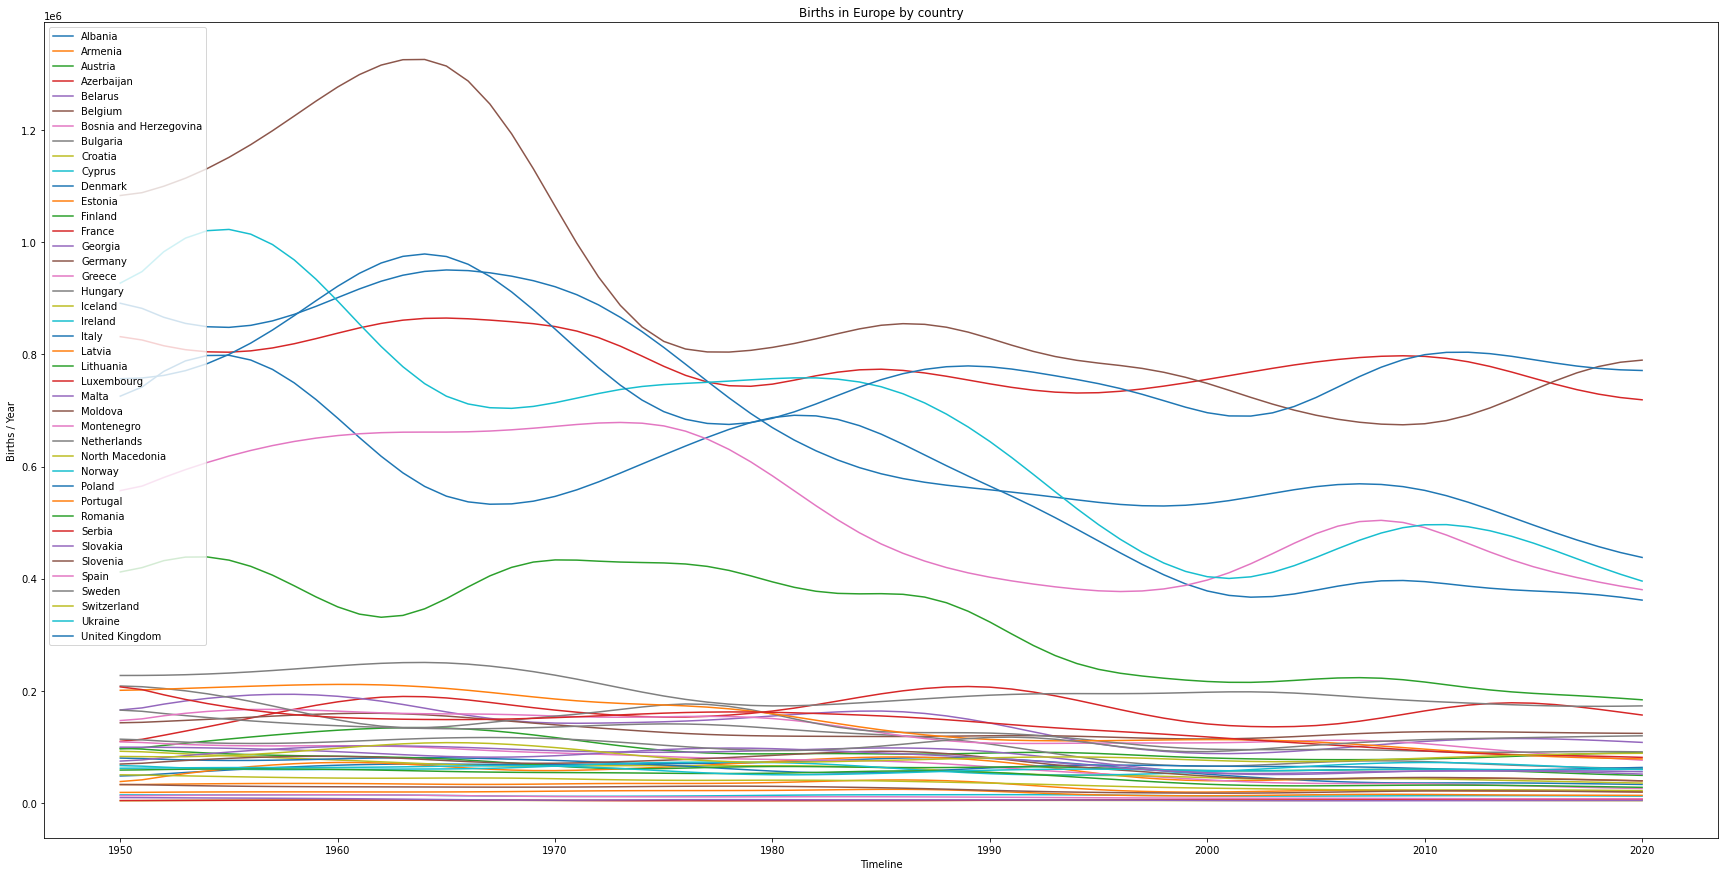

In [26]:
country_list = continent_dict['Europe']['df']['Country'].to_numpy()

plot_countries_births_over_time(country_list, title='Births in Europe by country')

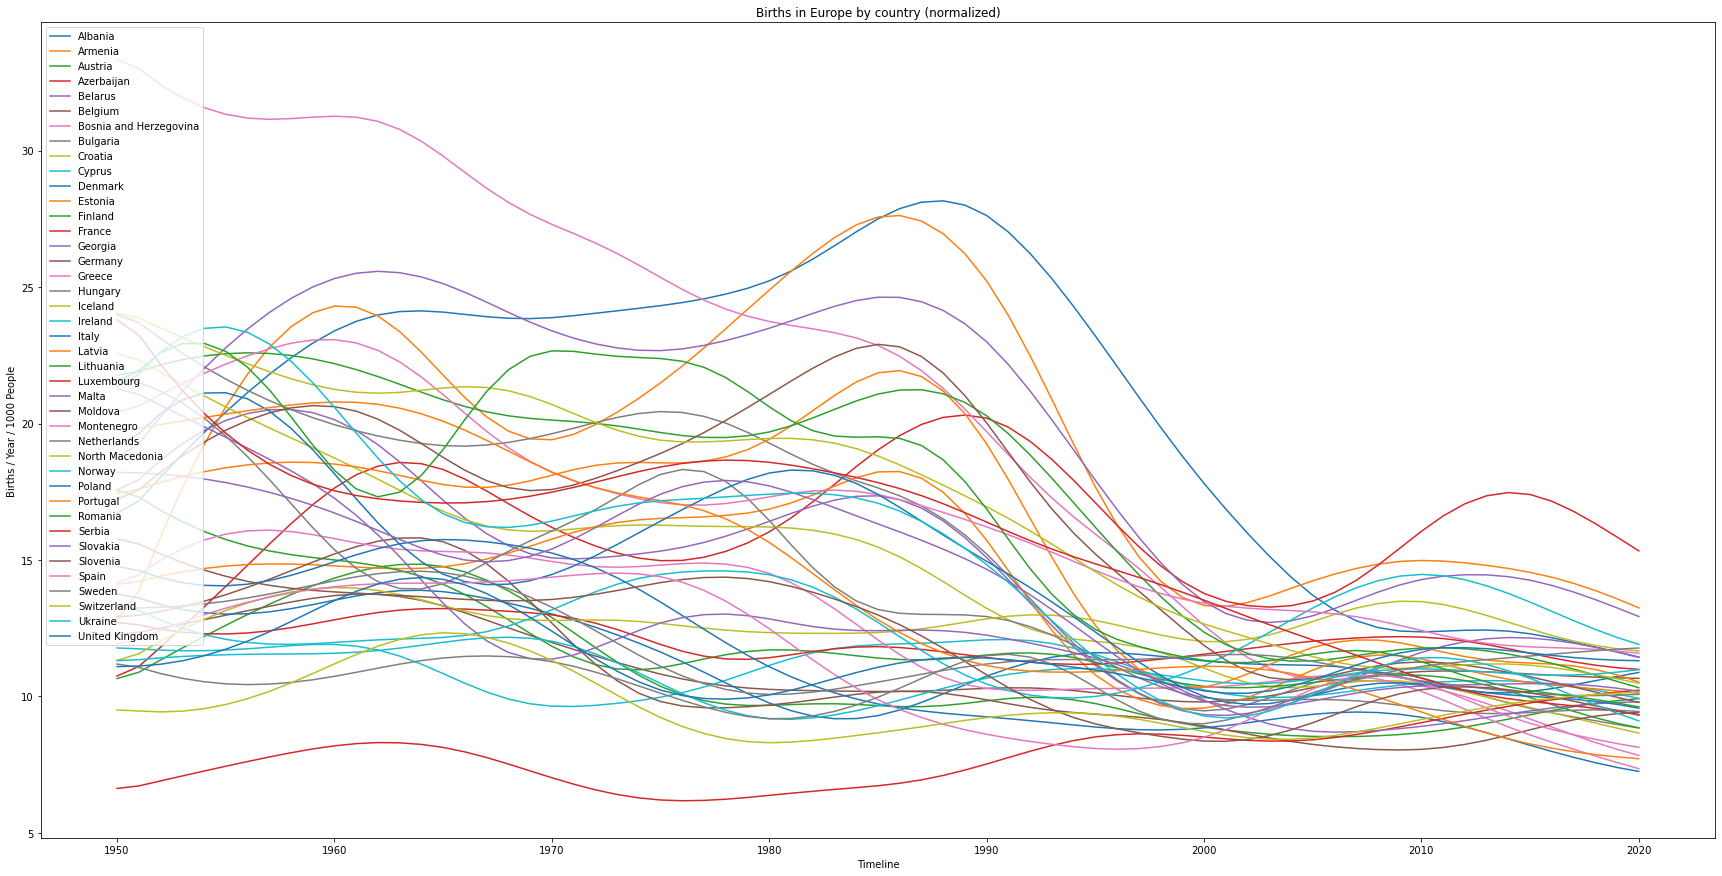

In [27]:
plot_countries_births_over_time(country_list, title='Births in Europe by country (normalized)', normalized=True)

We can see from the numbers and from the graphs that we have dramatically less births than ever in Europe.

## North America

In [28]:
get_data_per_continent('North America')

Current Population:  594914497.00
Future Population:   634242385.94
Absolute Difference: 39327888.94
Change in Percent:   6.61%


Country  Current Population  Future Population  \
195               Antigua and Barbuda           98,731.00         112,982.47   
179                           Bahamas          396,913.00         399,748.54   
185                          Barbados          287,711.00         241,371.12   
178                            Belize          404,914.00         598,028.72   
38                             Canada       38,067,903.00      31,708,899.90   
124                        Costa Rica        5,139,052.00       5,543,987.46   
84                               Cuba       11,317,505.00       8,889,732.42   
85                 Dominican Republic       10,953,703.00      15,260,537.84   
112                       El Salvador        6,518,499.00       8,543,043.47   
192                           Grenada          113,021.00         131,255.76   
67                          Guatemala       18,249,860.00      31,647,079.35   
81                              Haiti       11,541,685.00      17,275,725.93   
90                           Honduras       10,062,991.00      15,667,074.15   
139                           Jamaica        2,973,463.00       3,491,313.52   
9                              Mexico      130,262,216.00     165,584,209.85   
109                         Nicaragua        6,702,385.00       9,852,577.86   
129                            Panama        4,381,579.00       6,233,376.40   
143                       Puerto Rico        2,828,255.00       1,666,509.48   
189                       Saint Lucia          184,400.00         164,903.29   
193  Saint Vincent and the Grenadines          111,263.00         112,935.44   
157               Trinidad and Tobago        1,403,375.00       1,287,989.65   
2                       United States      332,915,073.00     309,829,103.29   

     Change in %       Births  Life Expectancy  Birthrate now  \
195        14.43     1,467.00            77.02           1.99   
179         0.71     5,408.00            73.92           1.74   
185       -16.11     3,048.00            79.19           1.62   
178        47.69     8,014.00            74.62           2.27   
38        -16.70   386,464.00            82.05           1.51   
124         7.88    69,059.00            80.28           1.74   
84        -21.45   112,811.00            78.80           1.60   
85         39.32   205,998.00            74.08           2.32   
112        31.06   116,522.00            73.32           2.02   
192        16.13     1,813.00            72.40           2.04   
67         73.41   425,925.00            74.30           2.82   
81         49.68   269,929.00            64.00           2.89   
90         55.69   208,145.00            75.27           2.43   
139        17.42    46,879.00            74.47           1.97   
9          27.12 2,206,201.00            75.05           2.10   
109        47.00   132,276.00            74.48           2.38   
129        42.26    79,400.00            78.51           2.44   
143       -41.08    20,850.00            79.93           1.19   
189       -10.57     2,164.00            76.20           1.42   
193         1.50     1,557.00            72.53           1.87   
157        -8.22    17,522.00            73.51           1.71   
2          -6.93 3,932,450.00            78.79           1.77   

     Birthrate to restore  Birthrate to restore after 2 epochs      Continent  \
195                  1.75                                 1.53  North America   
179                  1.99                                 1.97  North America   
185                  2.38                                 2.84  North America   
178                  1.35                                 0.92  North America   
38                   2.40                                 2.88  North America   
124                  1.85                                 1.72  North America   
84                   2.55                                 3.24  North America   
85                   1.44                    

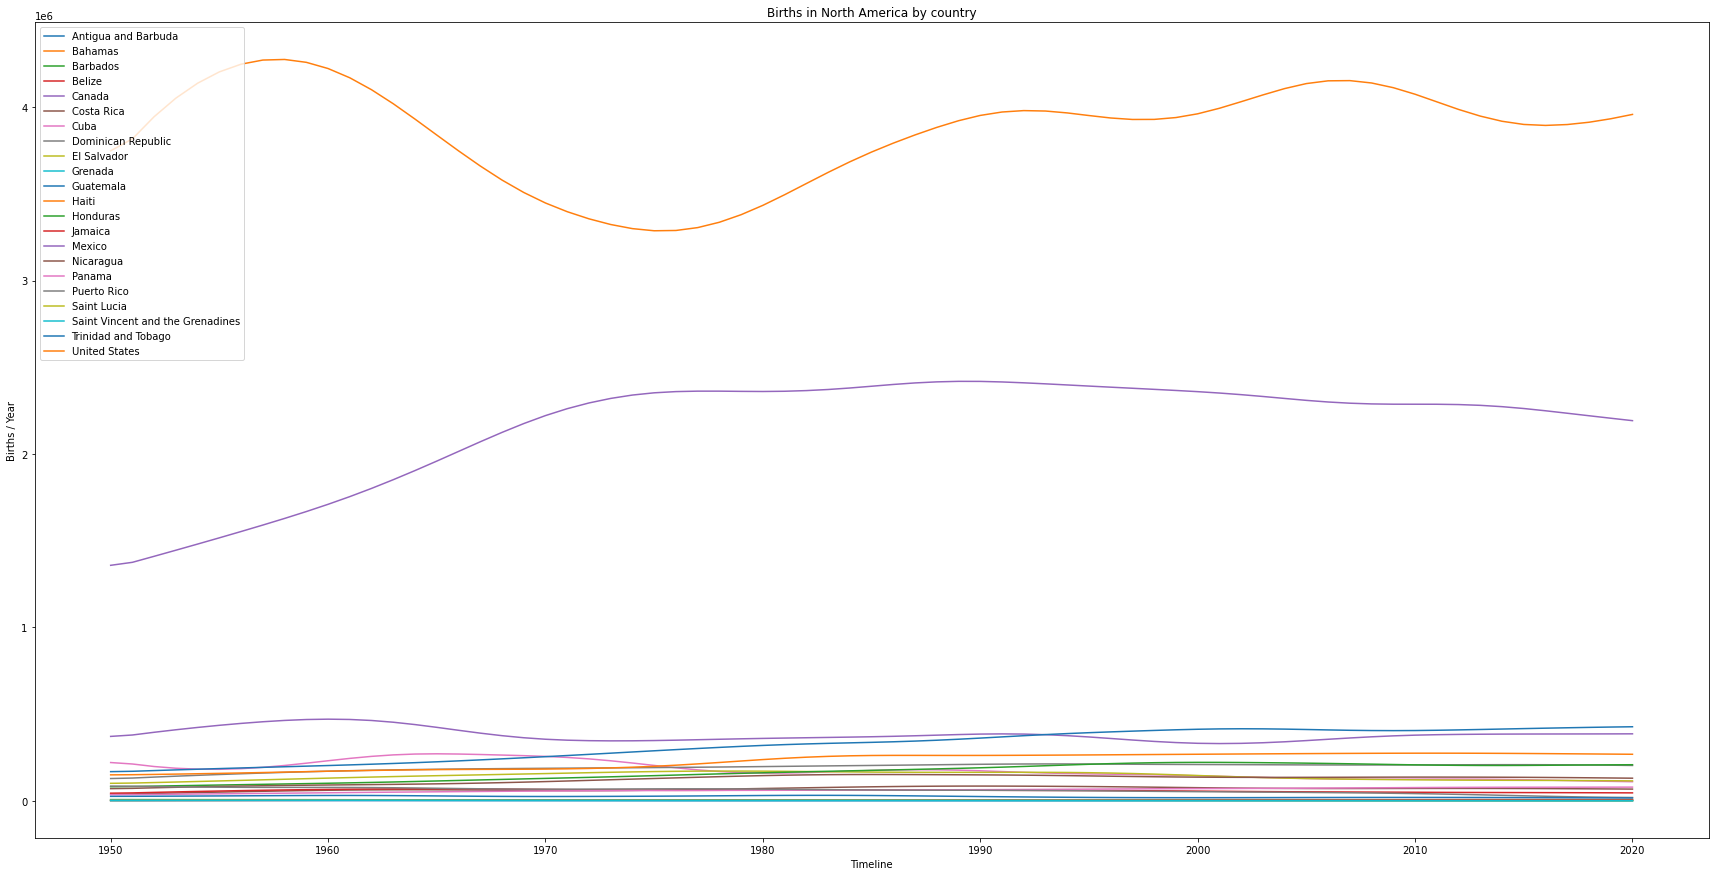

In [29]:
country_list = continent_dict['North America']['df']['Country'].to_numpy()

plot_countries_births_over_time(country_list, title='Births in North America by country')

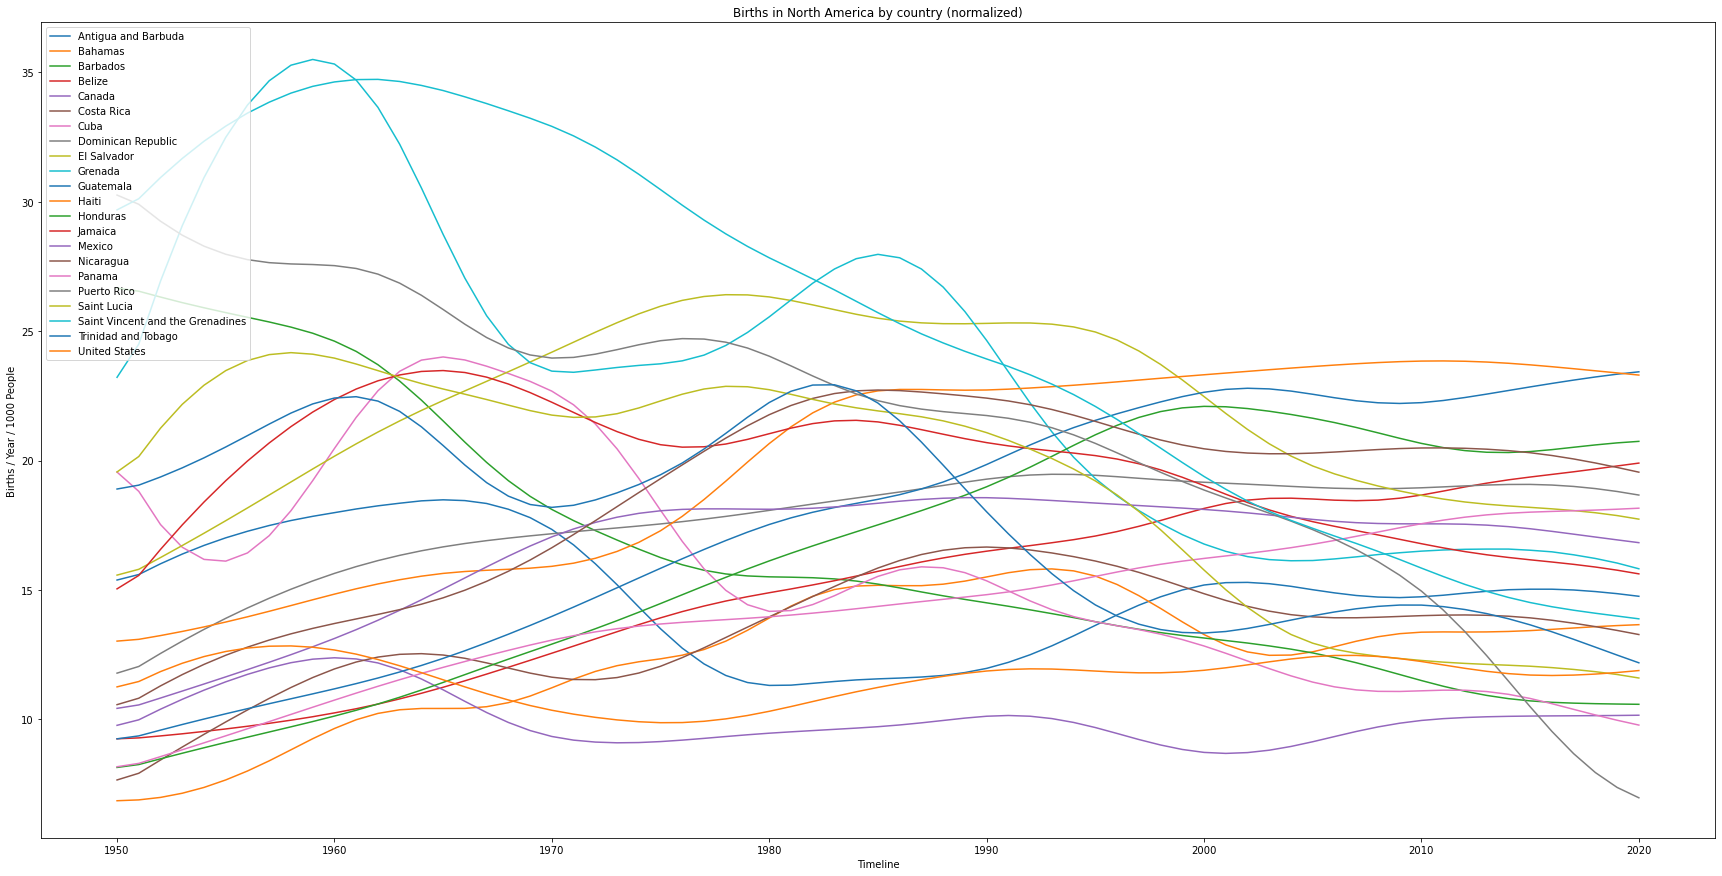

In [30]:
plot_countries_births_over_time(country_list, title='Births in North America by country (normalized)', normalized=True)

In North America we have in general a slight increase of the population.

## South America

In [31]:
get_data_per_continent('South America')

Current Population:  433950170.00
Future Population:   493086598.98
Absolute Difference: 59136428.98
Change in Percent:   13.63%


Country  Current Population  Future Population  Change in %  \
32   Argentina       45,605,826.00      57,775,944.53        26.69   
80     Bolivia       11,832,940.00      17,674,080.39        49.36   
6       Brazil      213,993,437.00     219,290,323.04         2.48   
64       Chile       19,212,361.00      18,363,934.61        -4.42   
28    Colombia       51,265,844.00      56,610,640.75        10.43   
68     Ecuador       17,888,475.00      25,962,458.31        45.14   
167     Guyana          790,326.00       1,079,069.02        36.53   
106   Paraguay        7,219,638.00      10,640,895.22        47.39   
44        Peru       33,359,418.00      44,097,263.23        32.19   
173   Suriname          591,800.00         762,194.71        28.79   
135    Uruguay        3,485,151.00       3,704,512.23         6.29   
50   Venezuela       28,704,954.00      37,125,282.94        29.33   

          Births  Life Expectancy  Birthrate now  Birthrate to restore  \
32    753,596.00            76.67           2.25                  1.58   
80    247,145.00            71.51           2.69                  1.34   
6   2,889,924.00            75.88           1.72                  1.95   
64    229,031.00            80.18           1.63                  2.09   
28    732,473.00            77.29           1.79                  1.81   
68    337,131.00            77.01           2.40                  1.38   
167    15,436.00            69.91           2.44                  1.46   
106   143,304.00            74.25           2.40                  1.36   
44    574,662.00            76.74           2.23                  1.51   
173    10,633.00            71.68           2.39                  1.55   
135    47,548.00            77.91           1.96                  1.88   
50    515,171.00            72.06           2.25                  1.55   

     Birthrate to restore after 2 epochs      Continent  Prediction year  \
32                                  1.25  South America             2095   
80                                  0.90  South America             2090   
6                                   1.90  South America             2094   
64                                  2.19  South America             2099   
28                                  1.64  South America             2096   
68                                  0.95  South America             2096   
167                                 1.07  South America             2088   
106                                 0.92  South America             2093   
44                                  1.14  South America             2095   
173                                 1.21  South America             2090   
135                                 1.77  South America             2096   
50                                  1.20  South America             2091   

     Data from year  
32             2019  
80             2019  
6              2019  
64             2019  
28             2019  
68             2019  
167            2019  
106            2019  
44             2019  
173            2019  
135            2019  
50             2019

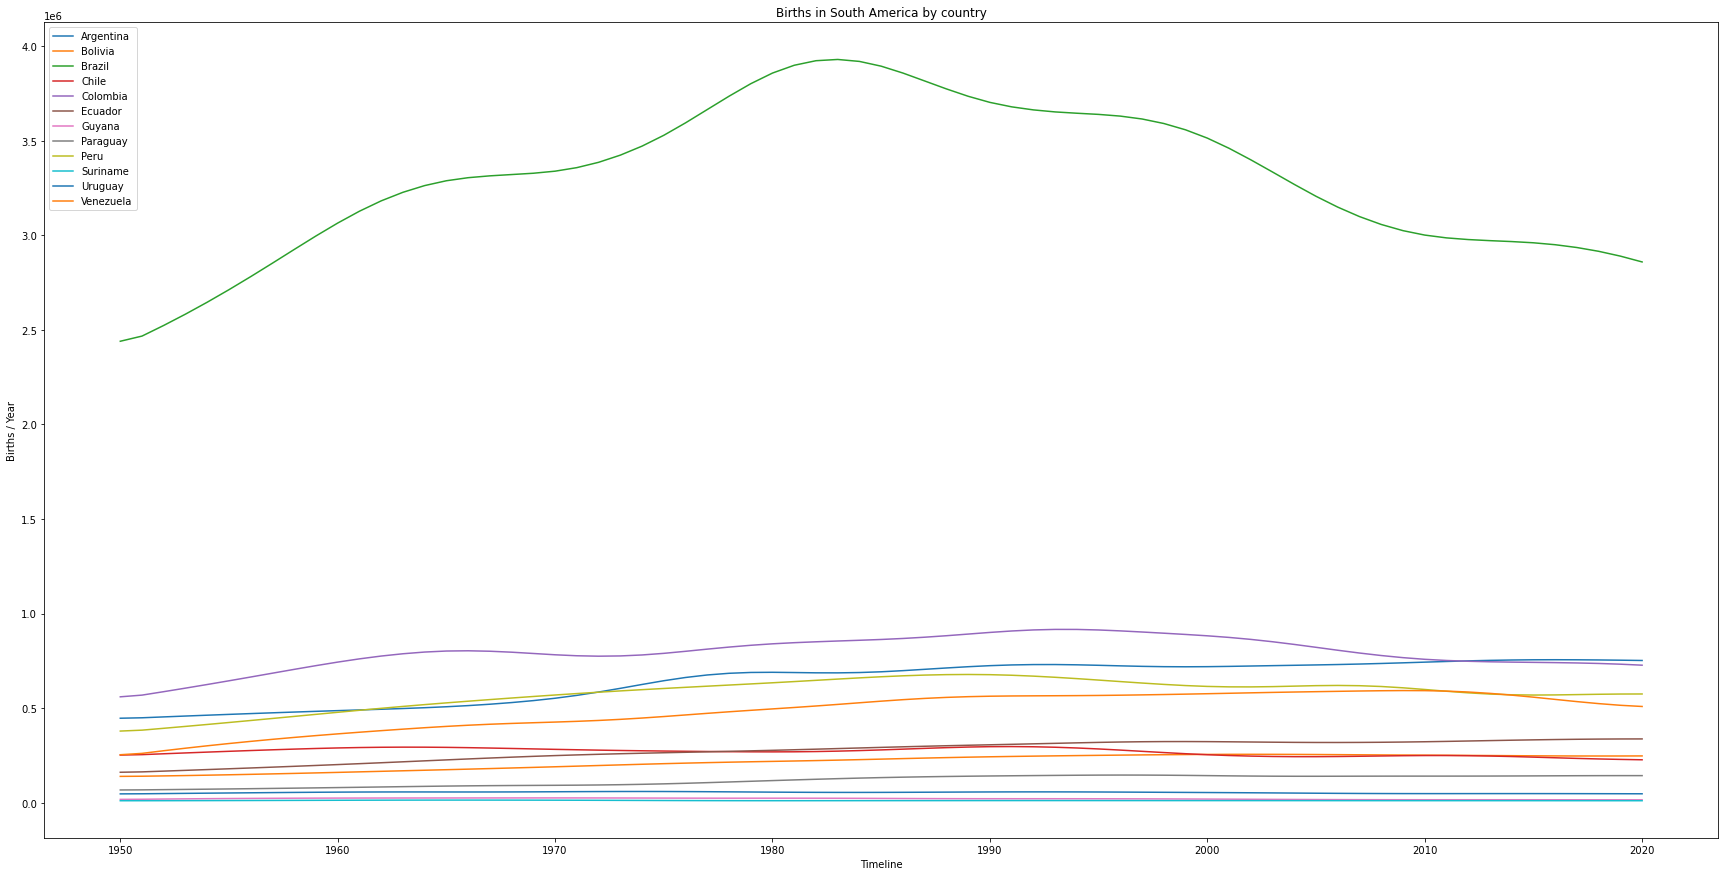

In [32]:
country_list = continent_dict['South America']['df']['Country'].to_numpy()

plot_countries_births_over_time(country_list, title='Births in South America by country')

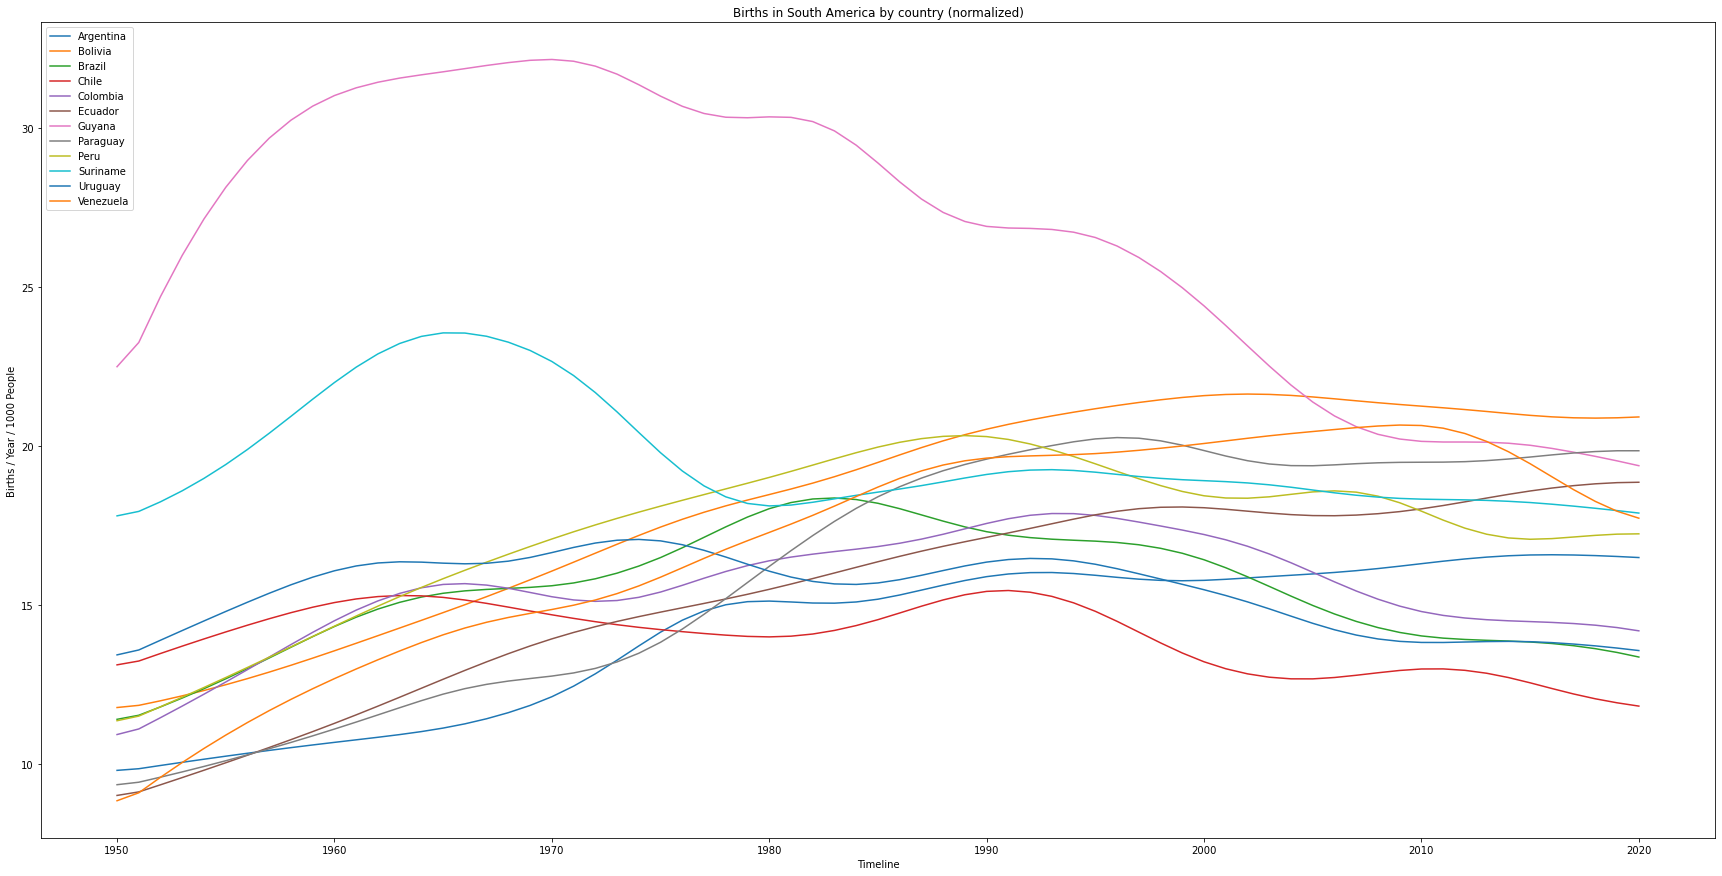

In [33]:
plot_countries_births_over_time(country_list, title='Births in South America by country (normalized)', normalized=True)

The increase of the population will be somewhat bigger in South America than in Nord America.

## Asia

In [34]:
get_data_per_continent('Asia')

Current Population:  4781328538.00
Future Population:   5432163687.73
Absolute Difference: 650835149.73
Change in Percent:   13.61%


Country  Current Population  Future Population  Change in %  \
37            Afghanistan       39,835,428.00      78,545,763.00        97.18   
155               Bahrain        1,748,296.00       1,701,119.63        -2.70   
7              Bangladesh      166,303,498.00     211,488,797.13        27.17   
168                Bhutan          779,898.00         931,450.13        19.43   
176                Brunei          441,532.00         474,883.60         7.55   
72               Cambodia       16,946,438.00      25,329,061.30        49.47   
0                   China    1,444,216,107.00   1,272,065,103.94       -11.92   
104             Hong Kong        7,552,810.00       7,020,470.43        -7.05   
1                   India    1,393,409,038.00   1,679,825,698.09        20.56   
3               Indonesia      276,361,783.00     344,286,786.05        24.58   
16                   Iran       85,028,759.00     116,893,473.08        37.48   
36                   Iraq       41,179,350.00      79,384,525.25        92.78   
99                 Israel        8,789,774.00      14,091,402.93        60.32   
10                  Japan      126,050,804.00      78,138,013.75       -38.01   
88                 Jordan       10,269,021.00      16,001,477.46        55.82   
65             Kazakhstan       18,994,962.00      27,551,099.12        45.04   
130                Kuwait        4,328,550.00       4,187,072.87        -3.27   
110            Kyrgyzstan        6,628,356.00      10,938,260.40        65.02   
105                  Laos        7,379,358.00      11,254,161.87        52.51   
111               Lebanon        6,769,146.00       9,223,759.80        36.26   
45               Malaysia       32,776,194.00      40,415,836.89        23.31   
175              Maldives          543,617.00         551,421.03         1.44   
136              Mongolia        3,329,289.00       5,247,795.96        57.63   
27                Myanmar       54,806,012.00      63,213,374.40        15.34   
49                  Nepal       29,674,920.00      39,828,903.94        34.22   
56            North Korea       25,887,041.00      25,680,180.86        -0.80   
122                  Oman        5,223,375.00       7,080,445.76        35.55   
4                Pakistan      225,199,937.00     405,610,444.36        80.11   
121             Palestine        5,222,748.00      10,613,572.17       103.22   
12            Philippines      111,046,913.00     155,427,039.23        39.97   
140                 Qatar        2,930,528.00       2,134,359.11       -27.17   
8                  Russia      145,912,025.00     132,006,702.52        -9.53   
41           Saudi Arabia       35,340,683.00      44,472,274.56        25.84   
114             Singapore        5,896,686.00       4,182,893.81       -29.06   
29            South Korea       51,305,186.00      30,535,923.66       -40.48   
59              Sri Lanka       21,497,310.00      25,498,885.52        18.61   
63                  Syria       18,275,702.00      30,650,654.53        67.71   
94             Tajikistan        9,749,627.00      19,858,814.04       103.69   
19               Thailand       69,950,850.00      54,575,755.70       -21.98   
17                 Turkey       85,042,738.00     101,627,985.56        19.50   
113          Turkmenistan        6,117,924.00       9,329,619.86        52.50   
93   United Arab Emirates        9,991,089.00       7,802,891.96       -21.90   
43             Uzbekistan       33,935,763.00      49,358,204.27        45.45   
14                Vietnam       98,168,833.00     119,497,539.20        21.73   
48                  Yemen       30,490,640.00      57,629,789.00        89.01   

           Births  Life Expectancy  Birthrate now  Birthrate to restore  \
37   1,211,509.00            64.83           4.32                  1.01   
155     22,009.00            77.29           1.96                  2.06   
7    2,913,430.00            72.59           2.01                 

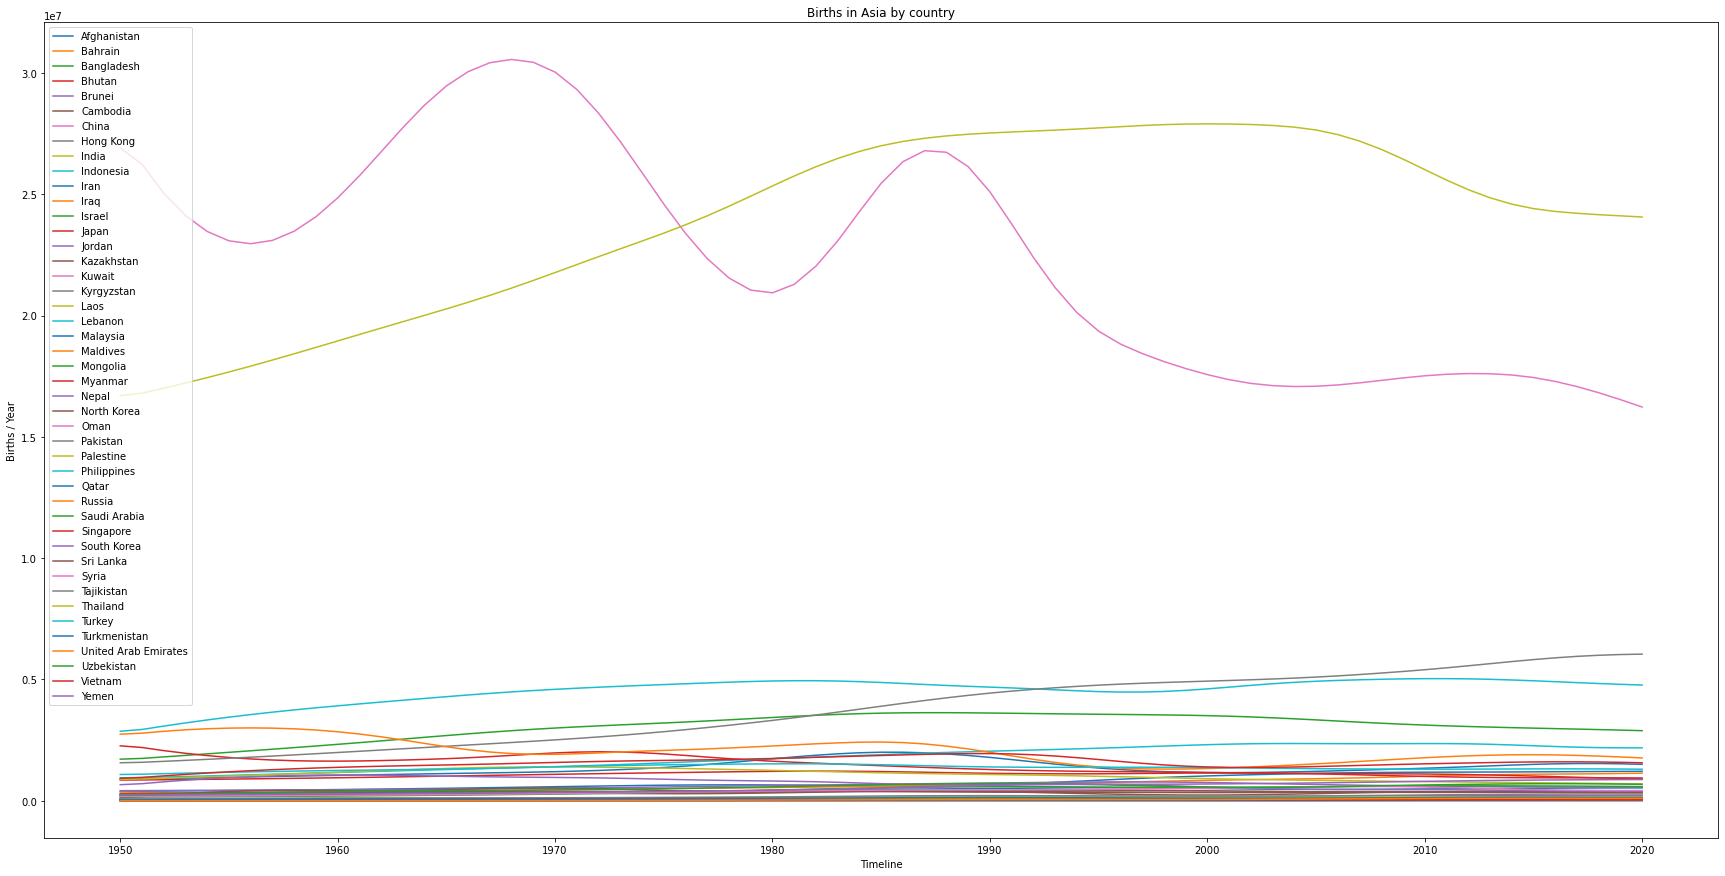

In [35]:
country_list = continent_dict['Asia']['df']['Country'].to_numpy()

plot_countries_births_over_time(country_list, title='Births in Asia by country')

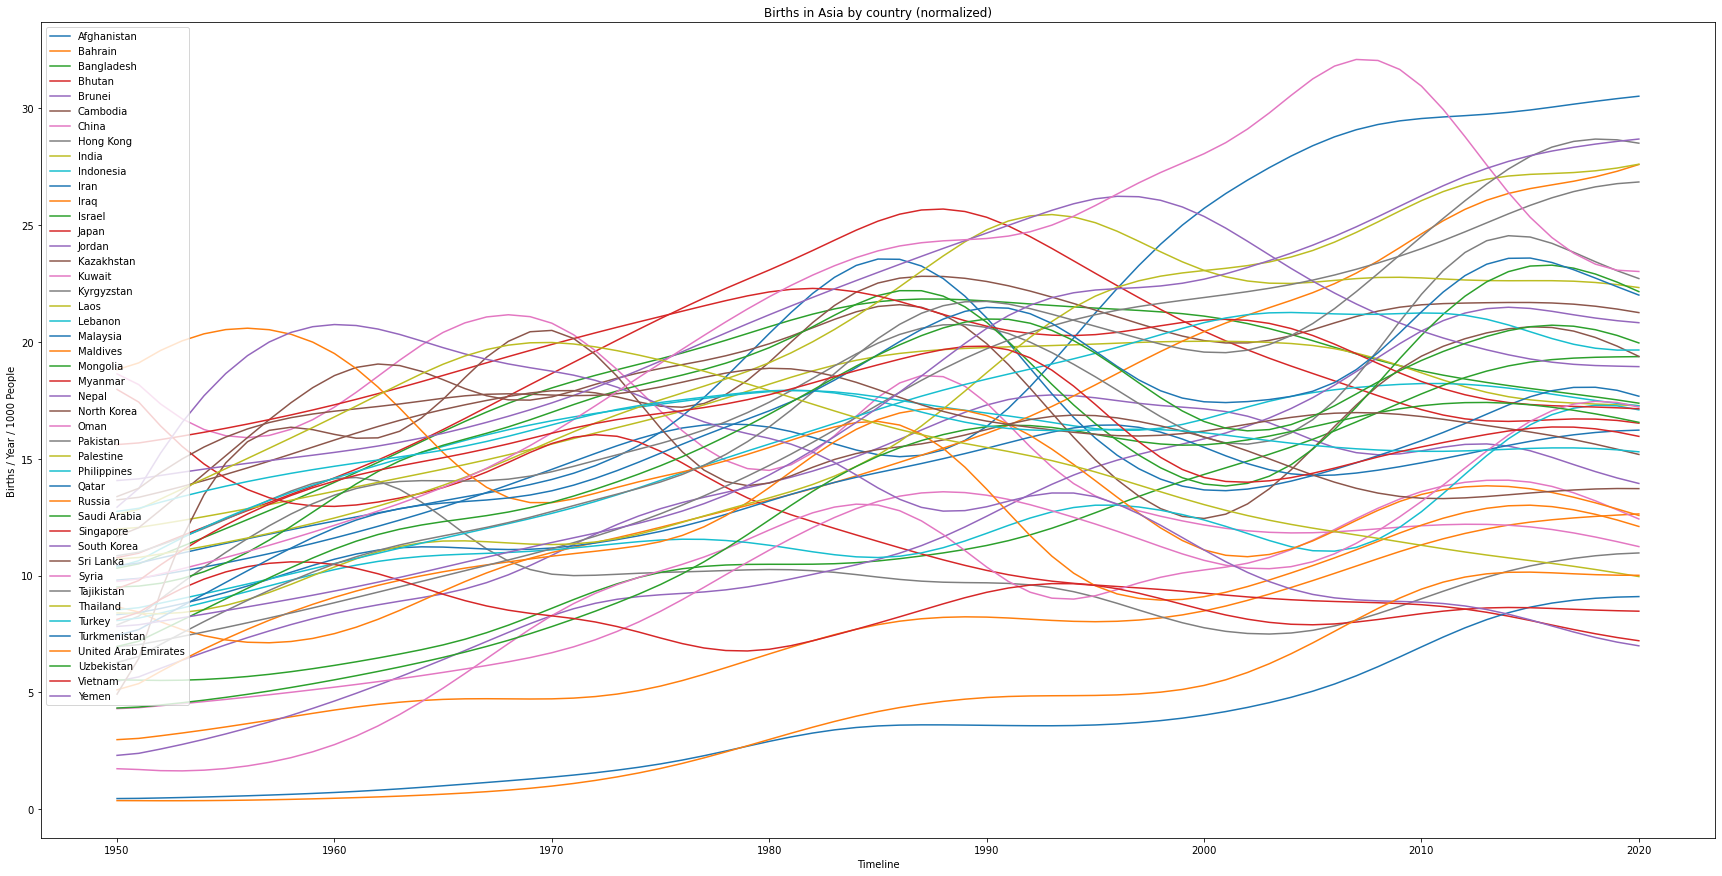

In [36]:
plot_countries_births_over_time(country_list, title='Births in Asia by country (normalized)', normalized=True)

The percentage of the increase of the population in Asia will be approximately the same as in South America.

## Oceania

In [37]:
get_data_per_continent('Oceania')

Current Population:  42117535.00
Future Population:   50655508.92
Absolute Difference: 8537973.92
Change in Percent:   20.27%


Country  Current Population  Future Population  Change in %  \
55          Australia       25,788,215.00      26,415,587.60         2.43   
164              Fiji          902,906.00       1,258,842.26        39.42   
190          Kiribati          121,392.00         221,310.45        82.31   
128       New Zealand        4,860,643.00       4,873,514.63         0.26   
97   Papua New Guinea        9,119,010.00      15,179,987.85        66.47   
188             Samoa          200,149.00         350,034.45        74.89   
169   Solomon Islands          703,996.00       1,561,749.42       121.84   
194             Tonga          106,760.00         177,834.76        66.57   
183           Vanuatu          314,464.00         616,647.50        96.09   

        Births  Life Expectancy  Birthrate now  Birthrate to restore  \
55  318,644.00            82.90           1.81                  1.95   
164  18,665.00            67.44           2.75                  1.43   
190   3,237.00            68.37           3.53                  1.10   
128  59,646.00            81.71           1.88                  1.99   
97  235,345.00            64.50           3.52                  1.20   
188   4,774.00            73.32           3.83                  1.14   
169  21,395.00            73.00           4.36                  0.90   
194   2,508.00            70.91           3.52                  1.20   
183   8,750.00            70.47           3.74                  1.02   

     Birthrate to restore after 2 epochs Continent  Prediction year  \
55                                  1.91   Oceania             2101   
164                                 1.03   Oceania             2086   
190                                 0.60   Oceania             2087   
128                                 1.99   Oceania             2100   
97                                  0.72   Oceania             2083   
188                                 0.65   Oceania             2092   
169                                 0.41   Oceania             2091   
194                                 0.72   Oceania             2089   
183                                 0.52   Oceania             2089   

     Data from year  
55             2019  
164            2019  
190            2019  
128            2019  
97             2019  
188            2019  
169            2019  
194            2019  
183            2019

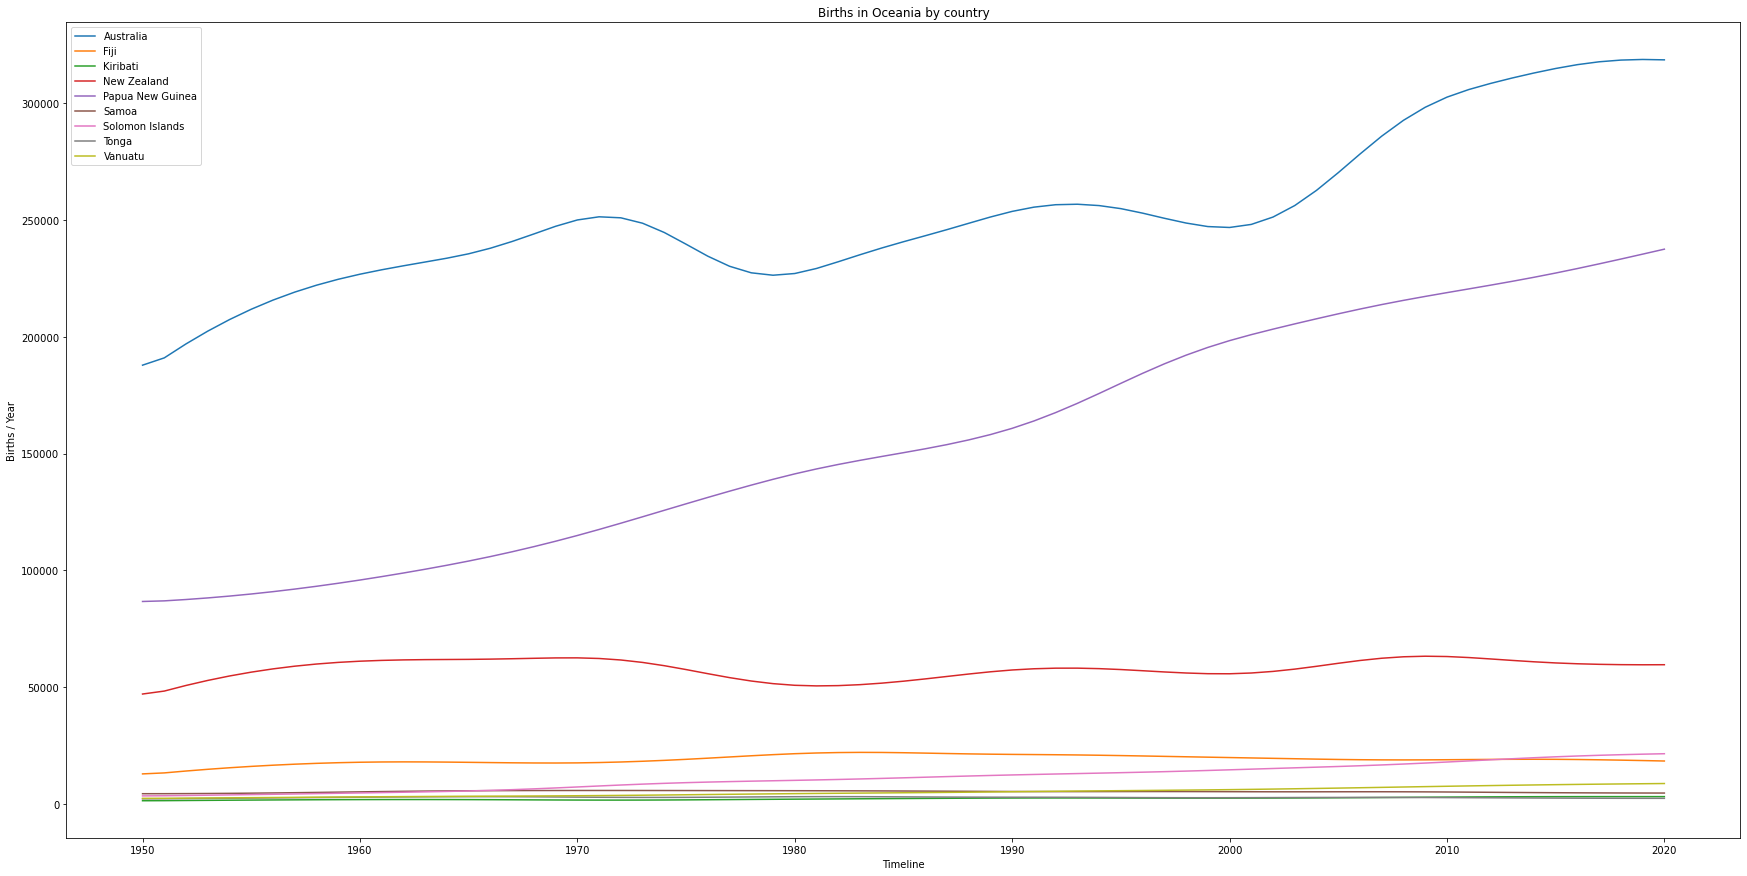

In [38]:
country_list = continent_dict['Oceania']['df']['Country'].to_numpy()

plot_countries_births_over_time(country_list, title='Births in Oceania by country')

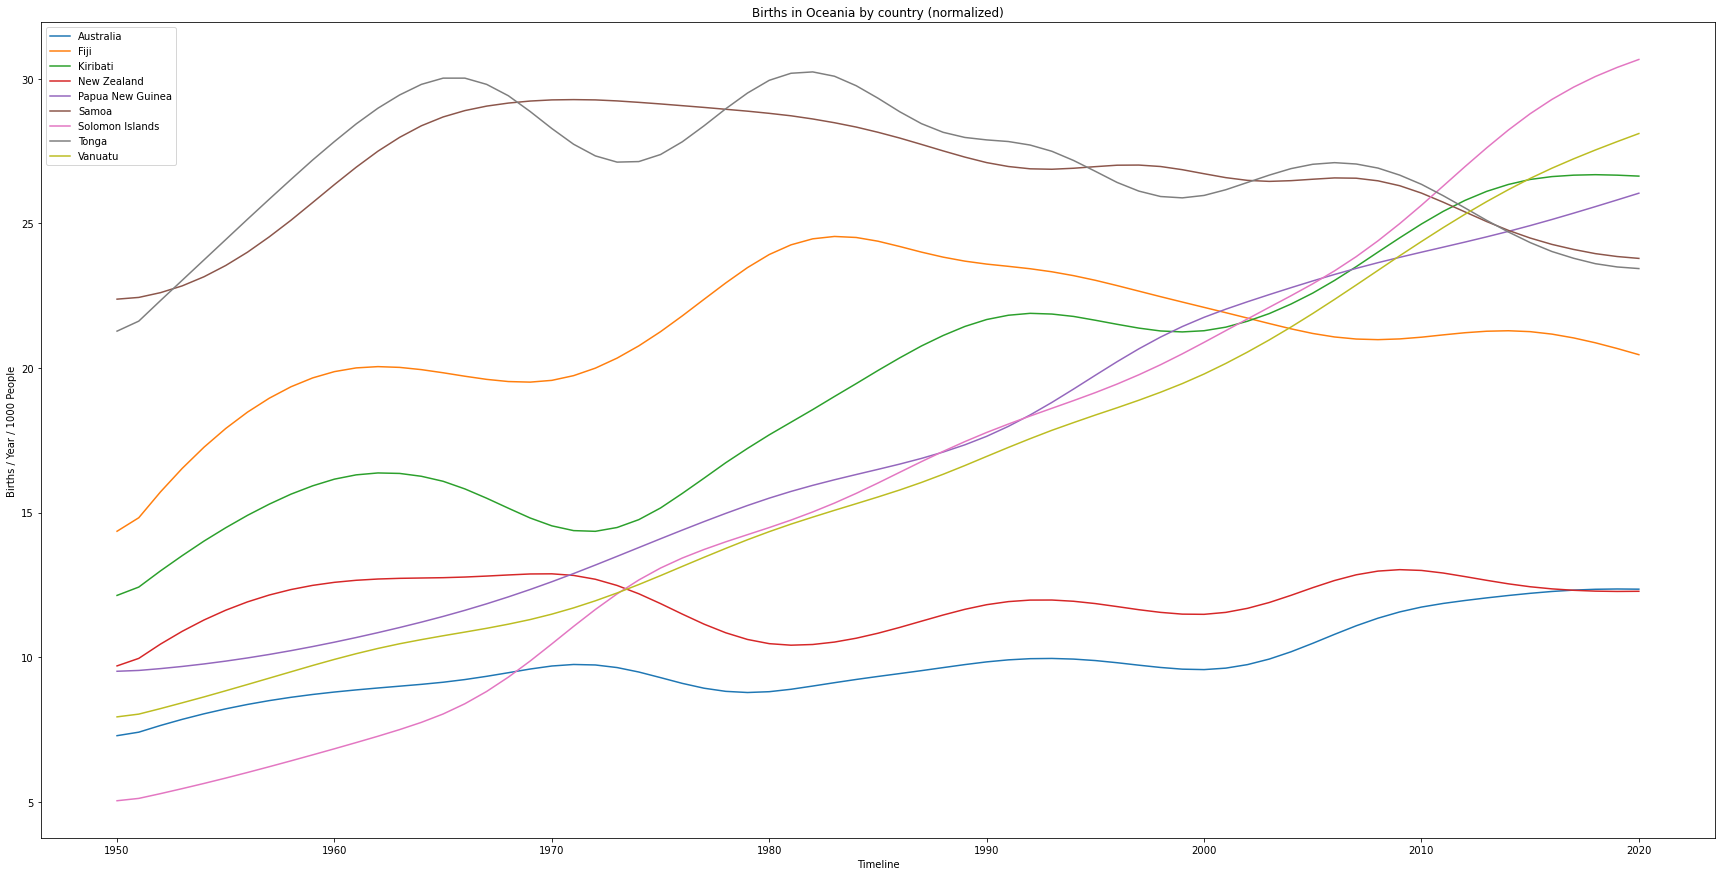

In [39]:
plot_countries_births_over_time(country_list, title='Births in Oceania by country (normalized)', normalized=True)

The biggest country of Oceania, Australia, will probably have a population with approximately the same size as today's population.
In general, the population on this continent will increase.

## Africa

In [40]:
get_data_per_continent('Africa')

Current Population:  1246598717.00
Future Population:   2426036561.54
Absolute Difference: 1179437844.54
Change in Percent:   94.61%


Country  Current Population  Future Population  \
34                    Algeria       44,616,624.00      77,817,013.44   
42                     Angola       33,933,610.00      78,481,440.74   
77                      Benin       12,451,040.00      26,159,894.96   
147                  Botswana        2,397,241.00       3,880,241.14   
58               Burkina Faso       21,497,096.00      46,952,277.77   
78                    Burundi       12,255,433.00      27,289,902.67   
52                   Cameroon       27,224,265.00      53,595,817.56   
174                Cape Verde          561,898.00         764,694.92   
126  Central African Republic        4,919,981.00       8,918,774.96   
70                       Chad       16,914,985.00      36,110,373.60   
166                   Comoros          888,451.00       1,719,879.22   
163                  Djibouti        1,002,187.00       1,371,500.83   
13                      Egypt      104,258,327.00     185,506,351.65   
156         Equatorial Guinea        1,449,896.00       2,612,415.33   
134                   Eritrea        3,601,467.00       6,932,268.85   
162                  Eswatini        1,172,362.00       1,789,326.84   
11                   Ethiopia      117,876,227.00     238,366,180.10   
148                     Gabon        2,278,825.00       4,463,524.92   
146                    Gambia        2,486,945.00       5,555,336.50   
47                      Ghana       31,732,129.00      56,544,728.33   
75                     Guinea       13,497,244.00      28,342,525.78   
152             Guinea-Bissau        2,015,494.00       3,874,272.14   
26                      Kenya       54,985,698.00      99,424,730.95   
149                   Lesotho        2,159,079.00       3,048,729.73   
123                   Liberia        5,180,203.00      10,367,283.50   
107                     Libya        6,958,532.00       9,034,431.09   
51                 Madagascar       28,427,328.00      58,713,770.35   
61                     Malawi       19,647,684.00      40,515,957.87   
60                       Mali       20,855,735.00      47,949,968.51   
127                Mauritania        4,775,119.00       9,782,834.07   
160                 Mauritius        1,273,433.00         949,996.22   
39                    Morocco       37,344,795.00      51,720,966.72   
46                 Mozambique       32,163,047.00      68,829,890.36   
145                   Namibia        2,587,344.00       4,474,722.50   
54                      Niger       25,130,817.00      66,621,739.88   
5                     Nigeria      211,400,708.00     412,040,732.74   
76                     Rwanda       13,276,513.00      27,237,974.78   
187     Sao Tome and Principe          223,368.00         472,283.35   
69                    Senegal       17,196,301.00      37,624,774.63   
196                Seychelles           98,908.00         117,422.92   
103              Sierra Leone        8,141,343.00      14,064,857.62   
73                    Somalia       16,359,504.00      36,980,026.14   
23               South Africa       60,041,994.00      75,533,876.59   
83                South Sudan       11,381,378.00      22,452,577.82   
33                      Sudan       44,909,353.00      89,142,787.97   
22                   Tanzania       61,498,437.00     138,210,213.09   
101                      Togo        8,478,250.00      16,156,962.81   
79                    Tunisia       11,935,766.00      15,305,515.55   
30                     Uganda       47,123,531.00     104,463,922.30   
62                     Zambia       18,920,651.00      40,927,607.61   
74                   Zimbabwe       15,092,171.00      26,821,261.61   

     Change in %       Births  Life Expectancy  Birthrate now  \
34         74.41 1,012,188.00            76.88           2.99   
42        131.28 1,283,488.00            61.15           5.44   
77        110.10   423,498.00            61.77           4.77   
147        61.86 

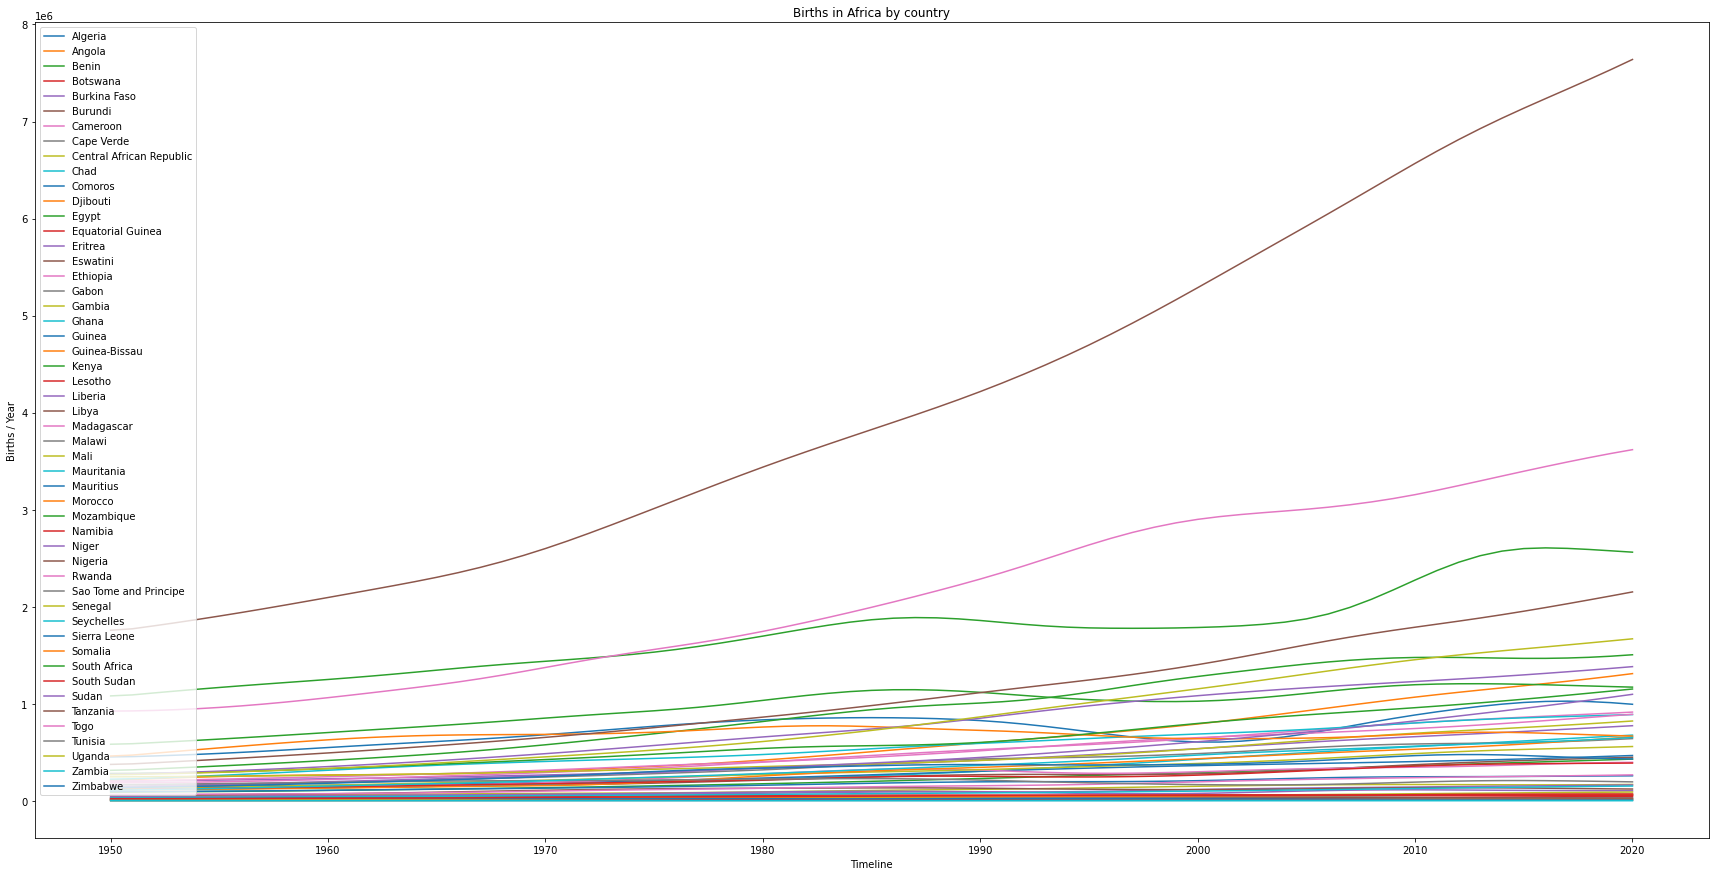

In [41]:
country_list = continent_dict['Africa']['df']['Country'].to_numpy()

plot_countries_births_over_time(country_list, title='Births in Africa by country')

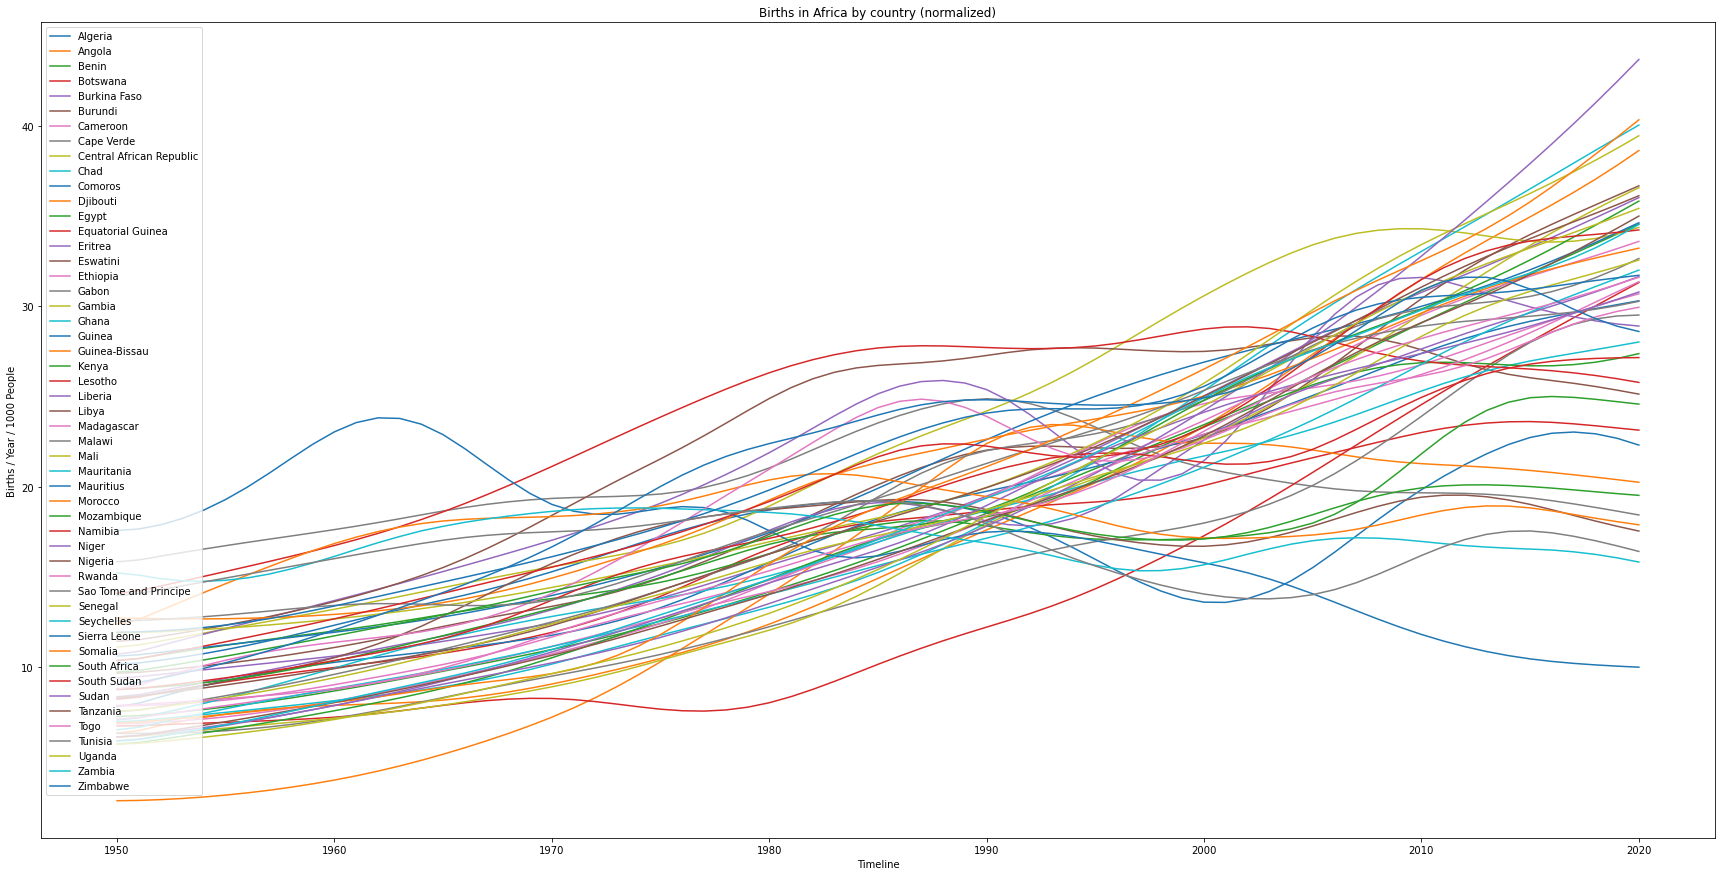

In [42]:
plot_countries_births_over_time(country_list, title='Births in Africa by country (normalized)', normalized=True)

Africa has clearly the biggest increase in birthrates.
According to my calculations, the population of Africa will be almost twice the size it is today.

# Big countries with a strongly falling birth rate

To create an even more clearer graph, let's choose only six countries.
These six countries have a big population but they also have a plunging birthrate.
Most of them have a birthrate change of about -38%, which means that in approximately 80-90 years, there will be just about 62% (!) of today's population in all six countries.
And this prediction assumes that the birthrate stays the same as it is right now. Since now, the birthrates of these countries have always continued to fall.

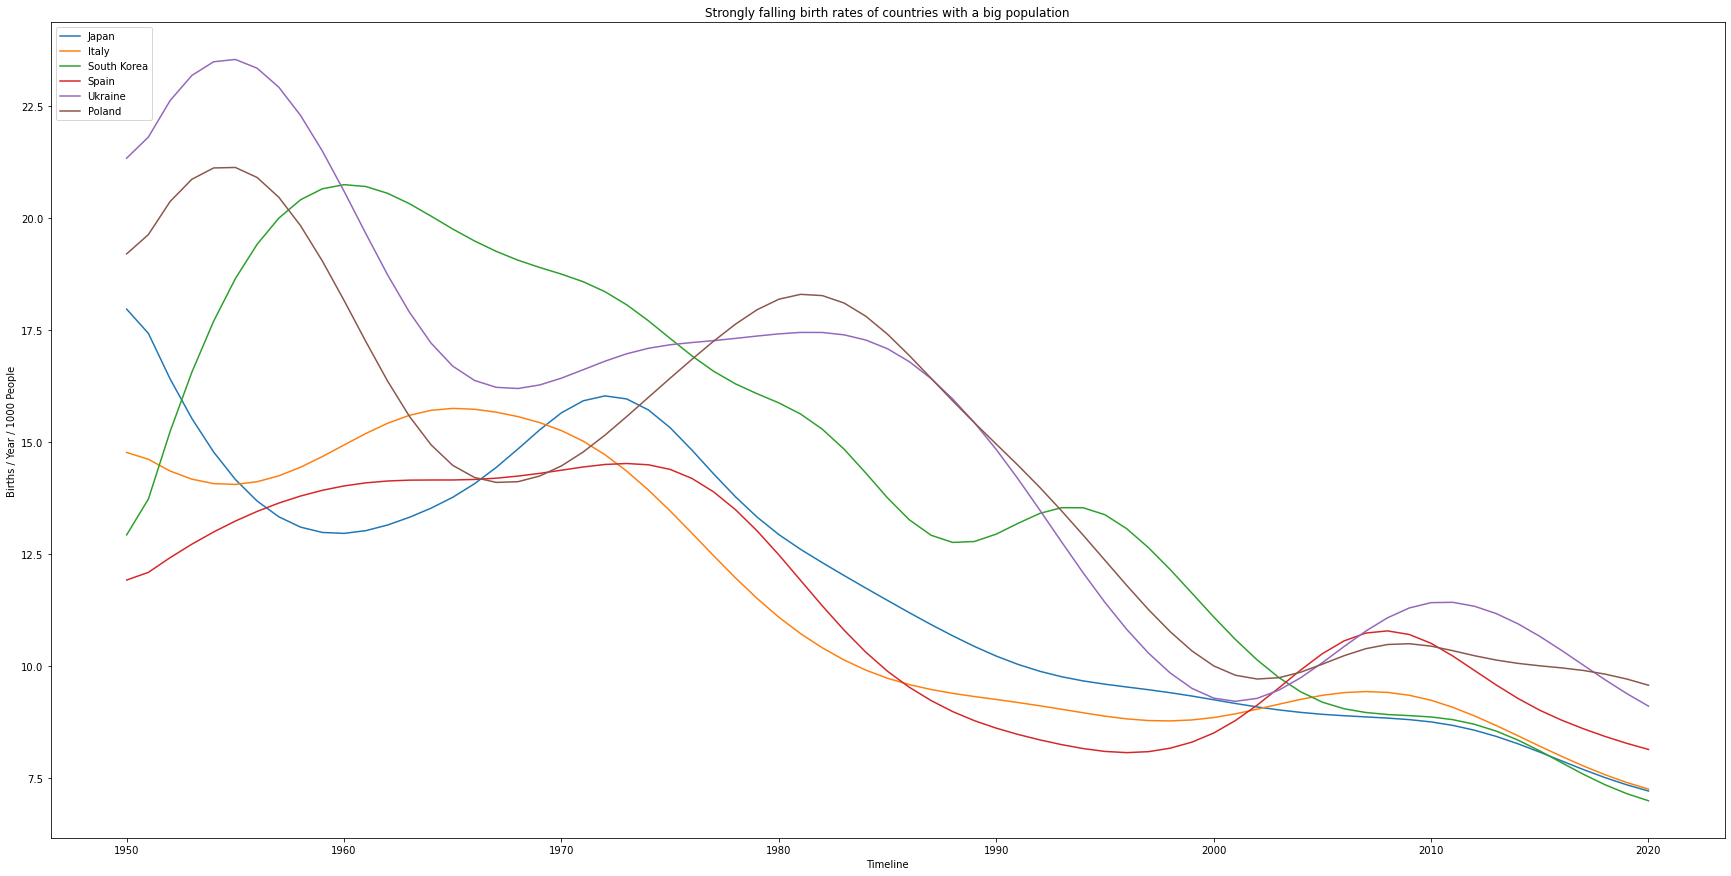

In [43]:
country_list = ['Japan', 'Italy', 'South Korea', 'Spain', 'Ukraine', 'Poland']

plot_countries_births_over_time(country_list, title='Strongly falling birth rates of countries with a big population', normalized=True)

# Insights

Obviously, with respect to the birthrate, we have two extreme sides.
On the one hand, we have countries with birth rates which are dropping like crazy (Japan, Italy, ...) and on the other hand we have mostly African countries with strongly rising birthrates.


**IMPORTANT**:
Note that almost 40% decrease of a population may at first not sound as crazy as 165% increase, but it definitely is at least as crazy.
Of course, a population cannot have a decrease of more than 100% (obviously) and according to my calculation there will be a bigger population on earth in 80-90 years but that's only the case if the birthrates stop decreasing.
Furthermore, the implications of a 40% decrease of a population are very concerning:
    1. 40% decrease in births means that in the future there are 40% less women (chain reaction)
    2. the birthrate per woman which is as low as 1.3 in Italy, Japan and Spain and even as low as 1.09 (!) in South Korea is probably not likely to increase anytime soon
    3. As long as the average birthrate of a country is under 2, the population will shrink


To sum up, the percentage of people born in Africa will in the future be much greater than it is now.
Hence, the percentage of people born in other continents, especially the percentage of Europeans, will be much smaller.
Additionally, it is very likely that the size of the population of many countries will decrease and that these countries will face a serious problem with the strongly falling birthrates.